In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np


/Users/mac/opt/anaconda3/envs/pytorchEnv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Device Agnostic Code

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# Initialization of the Hyperparamaters

In [3]:
# Hyper-parameters 
input_shape = 784 # 28x28
hidden1_neurons = 256 
hidden2_neurons = 128
output_shape = 10
batch_size = 32

# Loading the Dataset

In [4]:
# Setup training data
train_data = datasets.MNIST(
    root="C:/Users/user/Desktop/DL_Practical", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="C:/Users/user/Desktop/DL_Practical",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [5]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## Input and output shapes of a computer vision model

In [6]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [7]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)
# 60k training samples & 10k testing samples

(60000, 60000, 10000, 10000)

In [8]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# Data Visualization

Image shape: torch.Size([1, 28, 28])


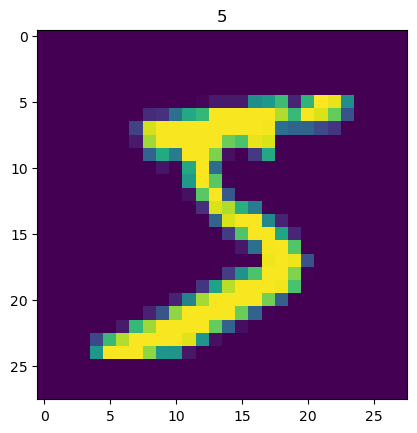

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

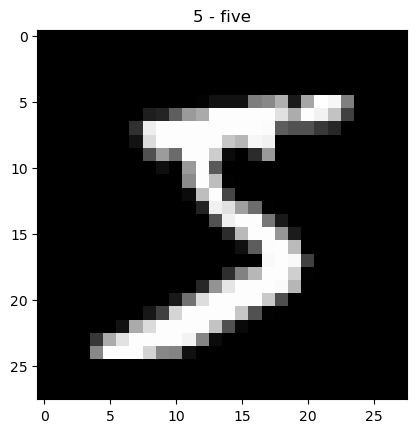

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

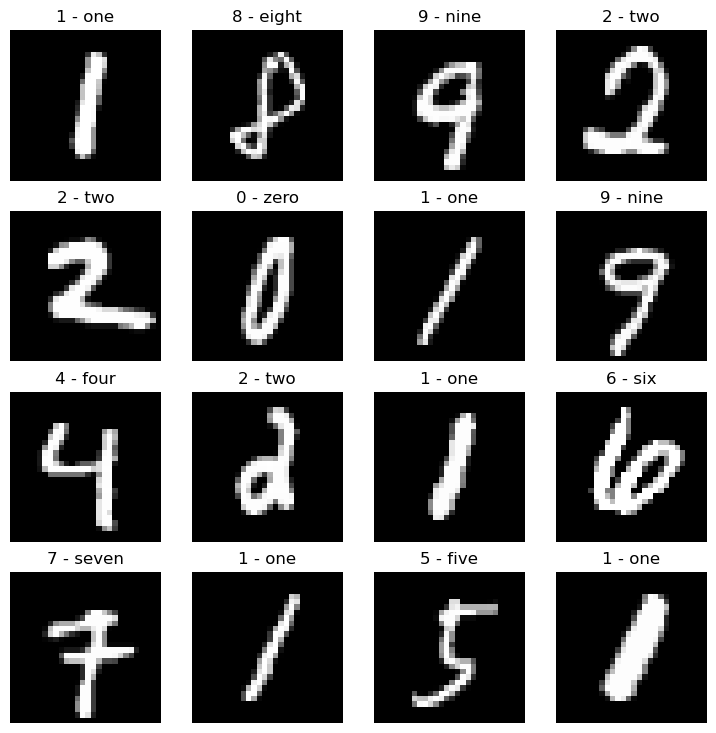

In [11]:
# Plot more images
torch.manual_seed(190)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

##  Prepare DataLoader

In [12]:
from torch.utils.data import DataLoader

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=batch_size, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=batch_size,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fa2bc9f0790>, <torch.utils.data.dataloader.DataLoader object at 0x7fa2bca07a90>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


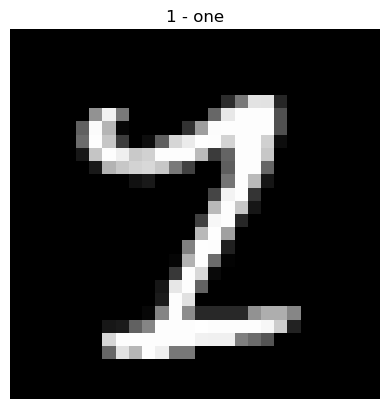

In [14]:
# Show a sample
torch.manual_seed(156)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Shape of images before/ after Flattening ( tensor --> vector)

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


# Architecture of the Neural Network

### 2 Hidden layers with:
- 256 neurons on the first hidden layer 
- 128 neurons on the second hidden layer 

### 2 Activation functions in between :
- ReLU()

In [16]:
from torch import nn

class Model(nn.Module): # 4 Layers with 2 hidden and activation functions
    def __init__(self, input_shape: int, hidden1_neurons: int, hidden2_neurons: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            #flatten inputs into single vector
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden1_neurons), 
            nn.ReLU(),
            nn.Linear(in_features=hidden1_neurons, out_features=hidden2_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden2_neurons, out_features=output_shape)
         )
        
    # perform forward pass with a sequential order
    def forward(self, x):
        return self.layer_stack(x)
    
    # Reset the weights & biases
    def reset_weights(self):
        for layer in self.layer_stack:
            if isinstance (layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)

In [17]:
model_1 = Model(input_shape,
              hidden1_neurons,
              hidden2_neurons,
              output_shape = len(class_names)
             ).to(device)
print(model_1)

Model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)


### Function for evaluation metrics

In [18]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


### Function for timing the experiments

In [19]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
   
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## Function for Training & Testing steps on batches of data

In [20]:
def train_test_loops(seed: int):
    # Import tqdm for progress bar
    from tqdm.auto import tqdm
    
    torch.manual_seed(seed)
    train_time_start_on_cpu = timer()

    epochs = num_epochs
    global train_loss_values
    global test_loss_values
    #store the loss values
    train_loss_values = []
    test_loss_values = []

    for epoch in tqdm(range(epochs)):
        ### Training
        train_loss, train_acc = 0, 0
    # Add a loop to loop through training batches
        for batch, (X, y) in enumerate(train_dataloader):
            # Send data to cpu
            X, y = X.to(device), y.to(device)
            model_1.train() 
        # 1. Forward pass
            y_pred = model_1(X)

        # 2. Calculate loss (per batch)
            loss = loss_fn(y_pred, y)
            train_loss += loss # accumulatively add up the loss per epoch
            train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels
        # 3. Optimizer zero grad
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        train_loss /= len(train_dataloader)
    # Divide total accuracy by length of test dataloader (per batch)
        train_acc /= len(train_dataloader)
        train_loss_values.append(train_loss.detach().numpy())
        test_loss, test_acc = 0, 0 
    
        model_1.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                # Send data to cpu
                X, y = X.to(device), y.to(device)
            # 1. Forward pass
                test_pred = model_1(X)
           
            # 2. Calculate loss (accumatively)
                test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch
                test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            test_loss /= len(test_dataloader)
            
            test_loss_values.append(test_loss.detach().numpy())
            test_acc /= len(test_dataloader)
       

    ## Print out what's happening
        print(f"\nIn Epoch: {epoch} | Train loss: {train_loss:.5f}, Train accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
        
# Calculate training time      
    train_time_end_on_cpu = timer()
    global total_train_time_model_1
    total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))


## Function for Predictions on the model

In [21]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module,
               seed: int,
               accuracy_fn):

    torch.manual_seed(seed)
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the Average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
            "model_loss": loss.item(),
            "model_acc": acc}

### Function for Plotting for the Training & Testing Loss

In [22]:
def plot_train_test_losses():
    plt.plot(train_loss_values, label='Train Loss')
    plt.plot(test_loss_values, label='Test Loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss Values')
    plt.legend()
    plt.show()


# Experiment 1 
- 10 different learning rates: [0.1, 0.4, 0.01, 0.005, 0.015, 0.001, 0.2, 0.0001, 0.05, 0.7]
- seed: 156
- Loss Fucntion: CrossEntropyLoss()
- Optimizer: Stochastic Gradient Descent (SGD) 
- Epochs: 5
- Batch Size: 32

 20%|█████████                                    | 1/5 [00:10<00:42, 10.59s/it]


In Epoch: 0 | Train loss: 0.35487, Train accuracy: 89.51% | Test loss: 0.15414, Test acc: 95.08%



 40%|██████████████████                           | 2/5 [00:25<00:39, 13.08s/it]


In Epoch: 1 | Train loss: 0.12243, Train accuracy: 96.26% | Test loss: 0.09854, Test acc: 96.98%



 60%|███████████████████████████                  | 3/5 [00:42<00:29, 14.95s/it]


In Epoch: 2 | Train loss: 0.08295, Train accuracy: 97.45% | Test loss: 0.08968, Test acc: 97.16%



 80%|████████████████████████████████████         | 4/5 [00:54<00:13, 13.57s/it]


In Epoch: 3 | Train loss: 0.06070, Train accuracy: 98.10% | Test loss: 0.07483, Test acc: 97.60%



100%|█████████████████████████████████████████████| 5/5 [01:05<00:00, 13.09s/it]


In Epoch: 4 | Train loss: 0.04706, Train accuracy: 98.53% | Test loss: 0.08029, Test acc: 97.35%

Train time on cpu: 65.457 seconds


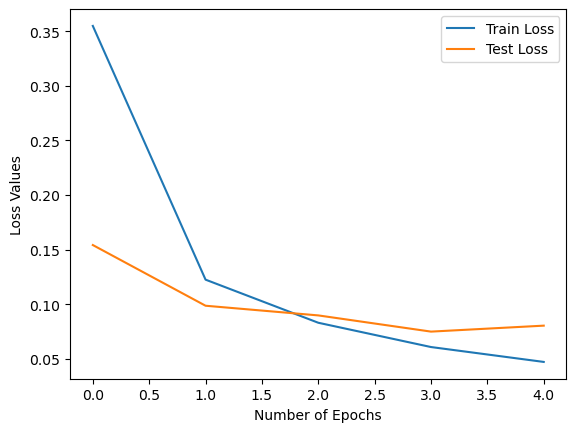

 20%|█████████                                    | 1/5 [00:10<00:43, 10.87s/it]


In Epoch: 0 | Train loss: 0.22745, Train accuracy: 92.87% | Test loss: 0.13760, Test acc: 95.81%



 40%|██████████████████                           | 2/5 [00:23<00:35, 11.96s/it]


In Epoch: 1 | Train loss: 0.09615, Train accuracy: 97.00% | Test loss: 0.11134, Test acc: 96.65%



 60%|███████████████████████████                  | 3/5 [00:37<00:25, 12.85s/it]


In Epoch: 2 | Train loss: 0.06801, Train accuracy: 97.86% | Test loss: 0.08740, Test acc: 97.44%



 80%|████████████████████████████████████         | 4/5 [00:48<00:11, 11.96s/it]


In Epoch: 3 | Train loss: 0.05067, Train accuracy: 98.33% | Test loss: 0.07558, Test acc: 97.81%



100%|█████████████████████████████████████████████| 5/5 [00:59<00:00, 11.83s/it]


In Epoch: 4 | Train loss: 0.04011, Train accuracy: 98.70% | Test loss: 0.09670, Test acc: 97.26%

Train time on cpu: 59.160 seconds


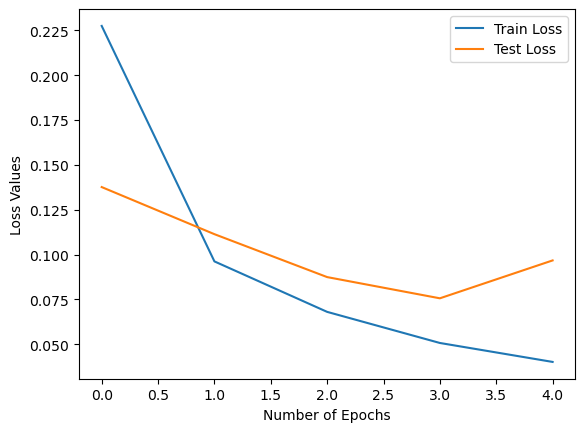

 20%|█████████                                    | 1/5 [00:10<00:42, 10.69s/it]


In Epoch: 0 | Train loss: 0.57491, Train accuracy: 85.49% | Test loss: 0.29843, Test acc: 91.59%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.90s/it]


In Epoch: 1 | Train loss: 0.27741, Train accuracy: 92.07% | Test loss: 0.24037, Test acc: 93.18%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.94s/it]


In Epoch: 2 | Train loss: 0.22611, Train accuracy: 93.56% | Test loss: 0.20810, Test acc: 94.04%



 80%|████████████████████████████████████         | 4/5 [00:43<00:10, 10.96s/it]


In Epoch: 3 | Train loss: 0.19280, Train accuracy: 94.54% | Test loss: 0.17950, Test acc: 94.98%



100%|█████████████████████████████████████████████| 5/5 [00:54<00:00, 10.95s/it]


In Epoch: 4 | Train loss: 0.16893, Train accuracy: 95.21% | Test loss: 0.15836, Test acc: 95.32%

Train time on cpu: 54.764 seconds


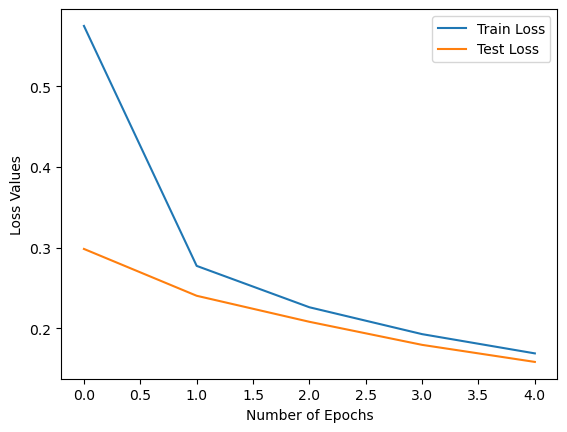

 20%|█████████                                    | 1/5 [00:10<00:42, 10.60s/it]


In Epoch: 0 | Train loss: 0.79108, Train accuracy: 81.04% | Test loss: 0.38034, Test acc: 89.88%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.87s/it]


In Epoch: 1 | Train loss: 0.34802, Train accuracy: 90.29% | Test loss: 0.29994, Test acc: 91.60%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.86s/it]


In Epoch: 2 | Train loss: 0.29006, Train accuracy: 91.73% | Test loss: 0.26588, Test acc: 92.31%



 80%|████████████████████████████████████         | 4/5 [00:43<00:10, 10.89s/it]


In Epoch: 3 | Train loss: 0.25667, Train accuracy: 92.73% | Test loss: 0.23823, Test acc: 93.48%



100%|█████████████████████████████████████████████| 5/5 [00:54<00:00, 10.93s/it]


In Epoch: 4 | Train loss: 0.23219, Train accuracy: 93.43% | Test loss: 0.21500, Test acc: 94.05%

Train time on cpu: 54.640 seconds


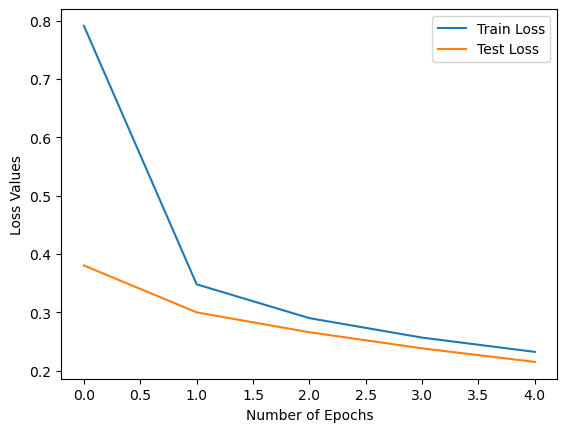

 20%|█████████                                    | 1/5 [00:10<00:42, 10.65s/it]


In Epoch: 0 | Train loss: 0.48666, Train accuracy: 87.31% | Test loss: 0.26254, Test acc: 92.58%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.87s/it]


In Epoch: 1 | Train loss: 0.24085, Train accuracy: 93.08% | Test loss: 0.20585, Test acc: 94.31%



 60%|███████████████████████████                  | 3/5 [00:33<00:22, 11.16s/it]


In Epoch: 2 | Train loss: 0.18988, Train accuracy: 94.58% | Test loss: 0.17519, Test acc: 94.83%



 80%|████████████████████████████████████         | 4/5 [00:44<00:11, 11.09s/it]


In Epoch: 3 | Train loss: 0.15694, Train accuracy: 95.53% | Test loss: 0.14679, Test acc: 95.83%



100%|█████████████████████████████████████████████| 5/5 [00:54<00:00, 10.98s/it]


In Epoch: 4 | Train loss: 0.13402, Train accuracy: 96.19% | Test loss: 0.12853, Test acc: 96.26%

Train time on cpu: 54.924 seconds


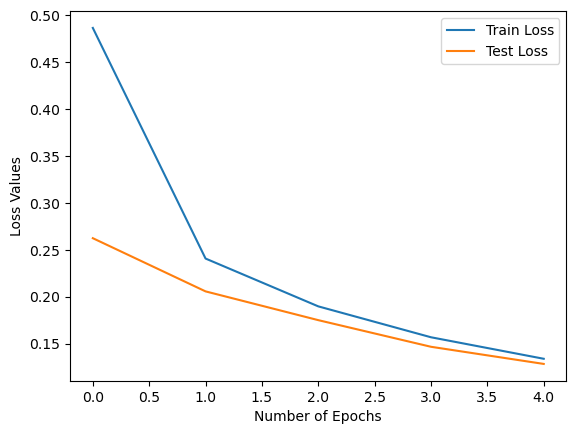

 20%|█████████                                    | 1/5 [00:11<00:44, 11.20s/it]


In Epoch: 0 | Train loss: 1.66967, Train accuracy: 61.70% | Test loss: 1.06588, Test acc: 79.65%



 40%|██████████████████                           | 2/5 [00:22<00:32, 10.99s/it]


In Epoch: 1 | Train loss: 0.81756, Train accuracy: 82.35% | Test loss: 0.62112, Test acc: 85.43%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.89s/it]


In Epoch: 2 | Train loss: 0.56567, Train accuracy: 86.18% | Test loss: 0.48331, Test acc: 87.72%



 80%|████████████████████████████████████         | 4/5 [00:43<00:10, 10.87s/it]


In Epoch: 3 | Train loss: 0.46793, Train accuracy: 87.86% | Test loss: 0.41719, Test acc: 89.07%



100%|█████████████████████████████████████████████| 5/5 [00:54<00:00, 10.90s/it]


In Epoch: 4 | Train loss: 0.41531, Train accuracy: 88.99% | Test loss: 0.37745, Test acc: 89.85%

Train time on cpu: 54.498 seconds


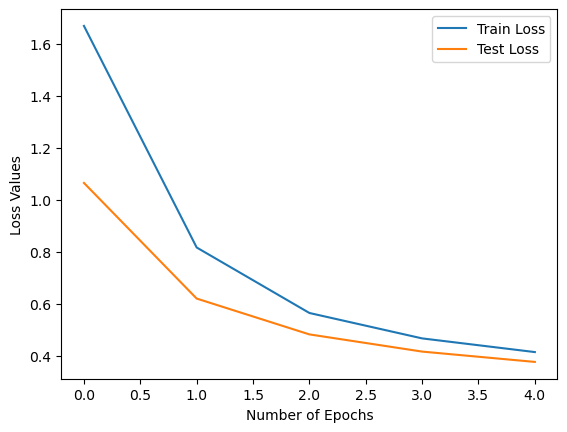

 20%|█████████                                    | 1/5 [00:11<00:44, 11.00s/it]


In Epoch: 0 | Train loss: 0.22403, Train accuracy: 93.04% | Test loss: 0.12778, Test acc: 95.93%



 40%|██████████████████                           | 2/5 [00:21<00:31, 10.65s/it]


In Epoch: 1 | Train loss: 0.09016, Train accuracy: 97.19% | Test loss: 0.09483, Test acc: 96.88%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.80s/it]


In Epoch: 2 | Train loss: 0.06310, Train accuracy: 98.02% | Test loss: 0.08012, Test acc: 97.51%



 80%|████████████████████████████████████         | 4/5 [00:43<00:10, 10.88s/it]


In Epoch: 3 | Train loss: 0.04654, Train accuracy: 98.52% | Test loss: 0.07552, Test acc: 97.69%



100%|█████████████████████████████████████████████| 5/5 [00:53<00:00, 10.76s/it]


In Epoch: 4 | Train loss: 0.03459, Train accuracy: 98.87% | Test loss: 0.08070, Test acc: 97.45%

Train time on cpu: 53.824 seconds


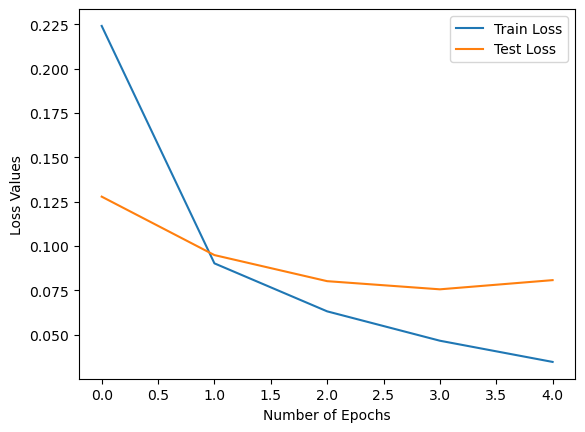

 20%|█████████                                    | 1/5 [00:10<00:43, 10.77s/it]


In Epoch: 0 | Train loss: 2.23506, Train accuracy: 17.86% | Test loss: 2.17028, Test acc: 27.10%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.74s/it]


In Epoch: 1 | Train loss: 2.11079, Train accuracy: 37.91% | Test loss: 2.04390, Test acc: 47.16%



 60%|███████████████████████████                  | 3/5 [00:31<00:21, 10.57s/it]


In Epoch: 2 | Train loss: 1.98677, Train accuracy: 54.05% | Test loss: 1.91457, Test acc: 60.75%



 80%|████████████████████████████████████         | 4/5 [00:42<00:10, 10.57s/it]


In Epoch: 3 | Train loss: 1.85890, Train accuracy: 63.71% | Test loss: 1.78171, Test acc: 67.90%



100%|█████████████████████████████████████████████| 5/5 [00:52<00:00, 10.60s/it]


In Epoch: 4 | Train loss: 1.72741, Train accuracy: 69.02% | Test loss: 1.64651, Test acc: 71.72%

Train time on cpu: 52.991 seconds


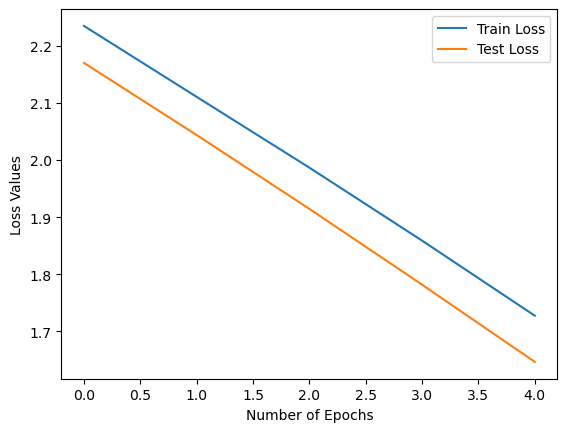

 20%|█████████                                    | 1/5 [00:10<00:40, 10.19s/it]


In Epoch: 0 | Train loss: 0.31667, Train accuracy: 91.07% | Test loss: 0.17307, Test acc: 94.80%



 40%|██████████████████                           | 2/5 [00:21<00:31, 10.62s/it]


In Epoch: 1 | Train loss: 0.14072, Train accuracy: 95.86% | Test loss: 0.11866, Test acc: 96.44%



 60%|███████████████████████████                  | 3/5 [00:31<00:20, 10.43s/it]


In Epoch: 2 | Train loss: 0.09821, Train accuracy: 97.06% | Test loss: 0.09750, Test acc: 96.94%



 80%|████████████████████████████████████         | 4/5 [00:41<00:10, 10.48s/it]


In Epoch: 3 | Train loss: 0.07401, Train accuracy: 97.79% | Test loss: 0.08571, Test acc: 97.40%



100%|█████████████████████████████████████████████| 5/5 [00:52<00:00, 10.44s/it]


In Epoch: 4 | Train loss: 0.05803, Train accuracy: 98.28% | Test loss: 0.07645, Test acc: 97.63%

Train time on cpu: 52.219 seconds


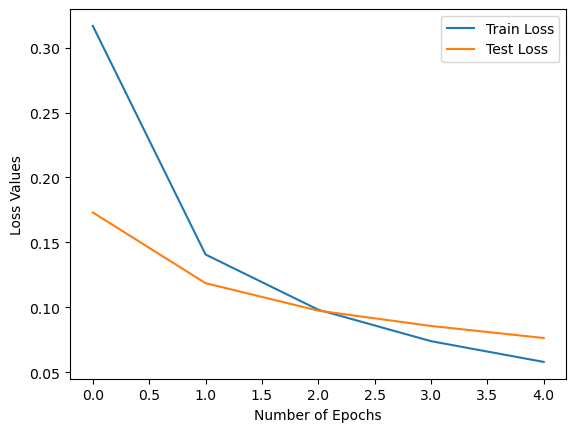

 20%|█████████                                    | 1/5 [00:10<00:41, 10.26s/it]


In Epoch: 0 | Train loss: 0.30141, Train accuracy: 90.92% | Test loss: 0.15353, Test acc: 95.52%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.15s/it]


In Epoch: 1 | Train loss: 0.13929, Train accuracy: 95.94% | Test loss: 0.19405, Test acc: 94.36%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.28s/it]


In Epoch: 2 | Train loss: 0.11410, Train accuracy: 96.62% | Test loss: 0.11304, Test acc: 96.65%



 80%|████████████████████████████████████         | 4/5 [00:41<00:10, 10.28s/it]


In Epoch: 3 | Train loss: 0.09582, Train accuracy: 97.33% | Test loss: 0.15018, Test acc: 96.30%



100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.20s/it]


In Epoch: 4 | Train loss: 0.08582, Train accuracy: 97.57% | Test loss: 0.14993, Test acc: 96.19%

Train time on cpu: 51.006 seconds


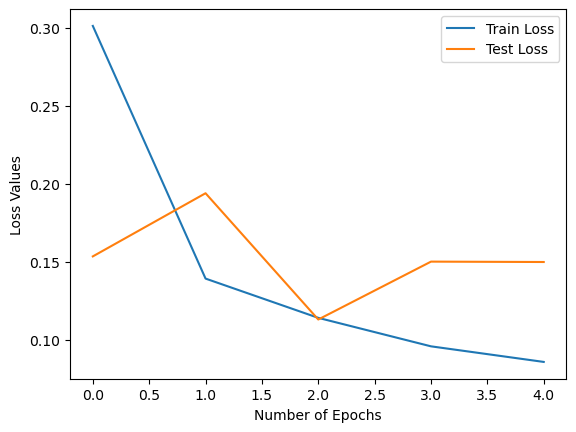

Learning Rate   Loss       Accuracy   Training Time
0.1             0.080      97.35      65.457    
0.4             0.097      97.26      59.160    
0.01            0.158      95.32      54.764    
0.005           0.215      94.05      54.640    
0.015           0.129      96.26      54.924    
0.001           0.377      89.85      54.498    
0.2             0.081      97.45      53.824    
0.0001          1.647      71.72      52.991    
0.05            0.076      97.63      52.219    
0.7             0.150      96.19      51.006    


In [23]:
learning_rates = [0.1, 0.4, 0.01, 0.005, 0.015, 0.001, 0.2, 0.0001, 0.05, 0.7]
results1 = []
prev_lr = None

# Reset the weights only when the learning_rate has changed value
for lr in learning_rates:
    if prev_lr is not None and lr != prev_lr:
        model_1.reset_weights()
    prev_lr = lr
    seed = 156
    num_epochs = 5
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_1.parameters(), lr=lr)
    train_test_loops(seed)
    plot_train_test_losses()
    # create a dictionary to store the results
    model_1_results = {} 
        #Calculate model1 results on test dataset
    model_1_results[lr] = eval_model(model=model_1, data_loader=test_dataloader,
                                     loss_fn=loss_fn, seed = seed, accuracy_fn=accuracy_fn)
    model_1_results[lr]['Training Time'] = total_train_time_model_1

    # Store the results
    results1.append({'Learning Rate': f'{lr}', 'Evaluation Results': model_1_results[lr]})

# Print them in a formatted way
print("{:<15} {:<10} {:<10} {:<10}".format("Learning Rate", "Loss", "Accuracy", "Training Time"))
for r in results1:
    lr = r['Learning Rate']
    loss = r['Evaluation Results']['model_loss']
    acc = r['Evaluation Results']['model_acc']
    time = r['Evaluation Results']['Training Time']
    print("{:<15} {:<10.3f} {:<10.2f} {:<10.3f}".format(lr, loss, acc, time))
# Reset weights when done, to start a new experiment
model_1.reset_weights() 

# Experiment 2 
- 10 different seeds: [201, 140, 193, 1003, 943, 41, 83, 580, 429, 734]
- learning rate: 0.1
- Loss Fucntion: CrossEntropyLoss()
- Optimizer: Stochastic Gradient Descent (SGD) 
- Epochs: 5
- Batch Size: 32

 20%|█████████                                    | 1/5 [00:10<00:41, 10.40s/it]


In Epoch: 0 | Train loss: 0.25431, Train accuracy: 92.44% | Test loss: 0.12355, Test acc: 96.20%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.15s/it]


In Epoch: 1 | Train loss: 0.10493, Train accuracy: 96.85% | Test loss: 0.09280, Test acc: 97.05%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.13s/it]


In Epoch: 2 | Train loss: 0.07162, Train accuracy: 97.75% | Test loss: 0.07578, Test acc: 97.65%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.08s/it]


In Epoch: 3 | Train loss: 0.05131, Train accuracy: 98.44% | Test loss: 0.07174, Test acc: 97.70%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.12s/it]


In Epoch: 4 | Train loss: 0.03864, Train accuracy: 98.78% | Test loss: 0.07986, Test acc: 97.40%

Train time on cpu: 50.621 seconds


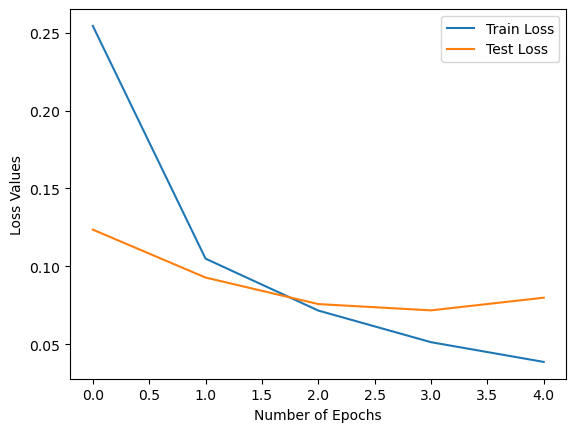

 20%|█████████                                    | 1/5 [00:10<00:42, 10.60s/it]


In Epoch: 0 | Train loss: 0.25856, Train accuracy: 92.39% | Test loss: 0.13389, Test acc: 95.96%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.17s/it]


In Epoch: 1 | Train loss: 0.10801, Train accuracy: 96.74% | Test loss: 0.10556, Test acc: 96.76%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.21s/it]


In Epoch: 2 | Train loss: 0.07333, Train accuracy: 97.72% | Test loss: 0.10149, Test acc: 96.82%



 80%|████████████████████████████████████         | 4/5 [00:41<00:10, 10.26s/it]


In Epoch: 3 | Train loss: 0.05381, Train accuracy: 98.31% | Test loss: 0.08274, Test acc: 97.35%



100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.28s/it]


In Epoch: 4 | Train loss: 0.04010, Train accuracy: 98.75% | Test loss: 0.06918, Test acc: 97.83%

Train time on cpu: 51.414 seconds


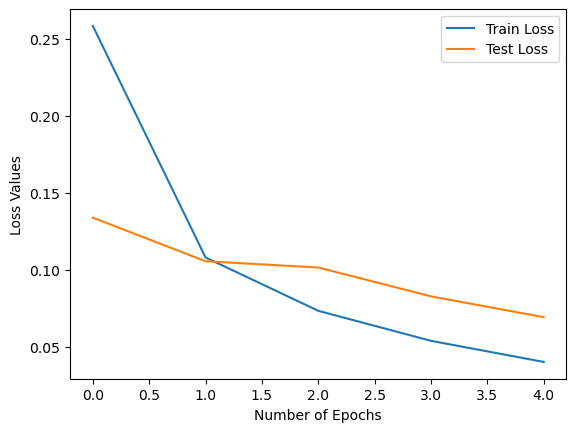

 20%|█████████                                    | 1/5 [00:10<00:40, 10.18s/it]


In Epoch: 0 | Train loss: 0.25547, Train accuracy: 92.39% | Test loss: 0.13212, Test acc: 95.90%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.21s/it]


In Epoch: 1 | Train loss: 0.10471, Train accuracy: 96.87% | Test loss: 0.09649, Test acc: 97.14%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.21s/it]


In Epoch: 2 | Train loss: 0.07366, Train accuracy: 97.70% | Test loss: 0.08466, Test acc: 97.36%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.19s/it]


In Epoch: 3 | Train loss: 0.05241, Train accuracy: 98.42% | Test loss: 0.07491, Test acc: 97.81%



100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.23s/it]


In Epoch: 4 | Train loss: 0.04069, Train accuracy: 98.73% | Test loss: 0.06964, Test acc: 97.88%

Train time on cpu: 51.158 seconds


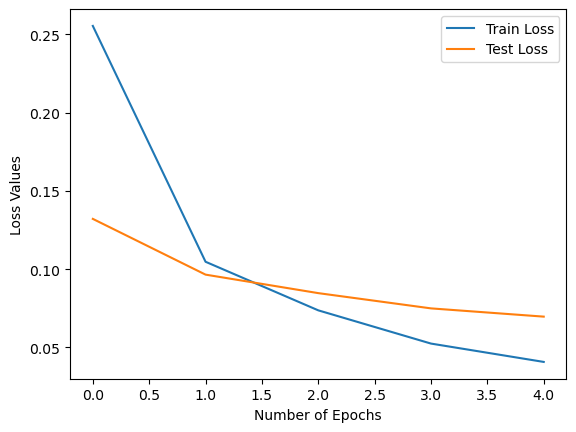

 20%|█████████                                    | 1/5 [00:09<00:39,  9.95s/it]


In Epoch: 0 | Train loss: 0.25566, Train accuracy: 92.43% | Test loss: 0.13689, Test acc: 95.74%



 40%|██████████████████                           | 2/5 [00:20<00:31, 10.59s/it]


In Epoch: 1 | Train loss: 0.10228, Train accuracy: 96.95% | Test loss: 0.08748, Test acc: 97.18%



 60%|███████████████████████████                  | 3/5 [00:31<00:21, 10.76s/it]


In Epoch: 2 | Train loss: 0.07040, Train accuracy: 97.83% | Test loss: 0.07260, Test acc: 97.63%



 80%|████████████████████████████████████         | 4/5 [00:41<00:10, 10.40s/it]


In Epoch: 3 | Train loss: 0.05154, Train accuracy: 98.44% | Test loss: 0.08678, Test acc: 97.37%



100%|█████████████████████████████████████████████| 5/5 [00:52<00:00, 10.47s/it]


In Epoch: 4 | Train loss: 0.03960, Train accuracy: 98.78% | Test loss: 0.06296, Test acc: 98.09%

Train time on cpu: 52.344 seconds


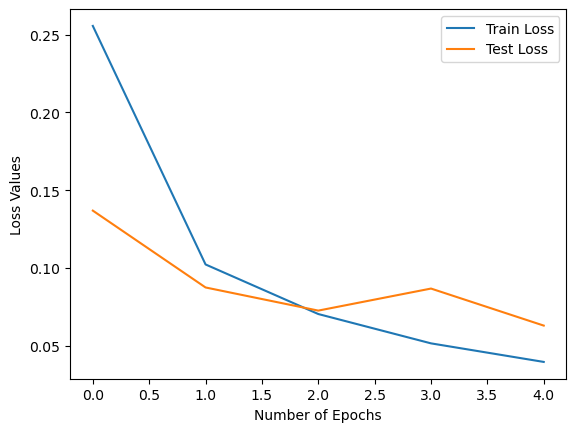

 20%|█████████                                    | 1/5 [00:09<00:39,  9.87s/it]


In Epoch: 0 | Train loss: 0.26068, Train accuracy: 92.27% | Test loss: 0.15591, Test acc: 95.18%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.08s/it]


In Epoch: 1 | Train loss: 0.10636, Train accuracy: 96.74% | Test loss: 0.09037, Test acc: 97.11%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.21s/it]


In Epoch: 2 | Train loss: 0.07233, Train accuracy: 97.74% | Test loss: 0.07649, Test acc: 97.45%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.08s/it]


In Epoch: 3 | Train loss: 0.05289, Train accuracy: 98.34% | Test loss: 0.07055, Test acc: 97.76%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.15s/it]


In Epoch: 4 | Train loss: 0.04000, Train accuracy: 98.74% | Test loss: 0.07226, Test acc: 97.85%

Train time on cpu: 50.731 seconds


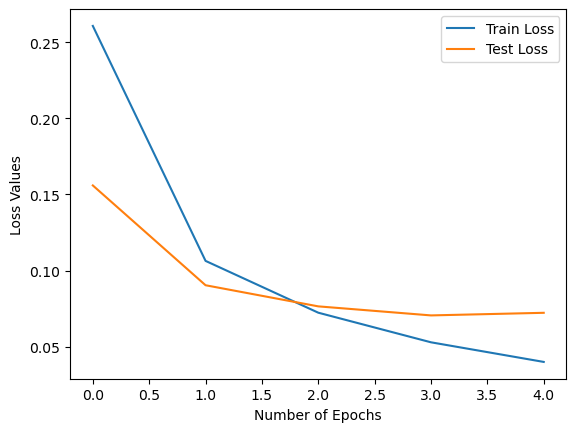

 20%|█████████                                    | 1/5 [00:10<00:41, 10.28s/it]


In Epoch: 0 | Train loss: 0.25443, Train accuracy: 92.43% | Test loss: 0.13025, Test acc: 95.87%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.02s/it]


In Epoch: 1 | Train loss: 0.10321, Train accuracy: 96.88% | Test loss: 0.09690, Test acc: 97.01%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.06s/it]


In Epoch: 2 | Train loss: 0.07210, Train accuracy: 97.78% | Test loss: 0.09699, Test acc: 97.05%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.19s/it]


In Epoch: 3 | Train loss: 0.05214, Train accuracy: 98.39% | Test loss: 0.07590, Test acc: 97.66%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.11s/it]


In Epoch: 4 | Train loss: 0.03918, Train accuracy: 98.78% | Test loss: 0.07525, Test acc: 97.82%

Train time on cpu: 50.564 seconds


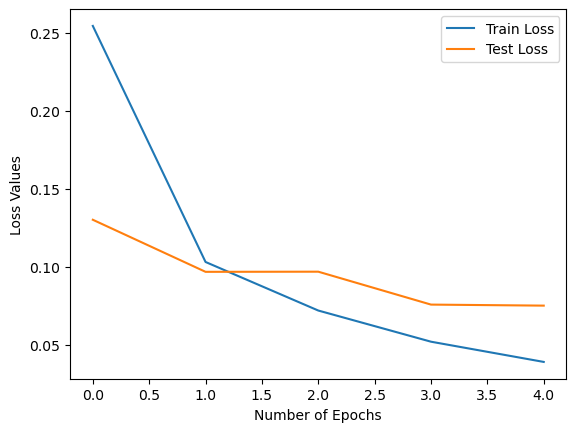

 20%|█████████                                    | 1/5 [00:10<00:40, 10.19s/it]


In Epoch: 0 | Train loss: 0.25760, Train accuracy: 92.30% | Test loss: 0.12574, Test acc: 96.08%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.20s/it]


In Epoch: 1 | Train loss: 0.10703, Train accuracy: 96.80% | Test loss: 0.09882, Test acc: 96.98%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.25s/it]


In Epoch: 2 | Train loss: 0.07112, Train accuracy: 97.88% | Test loss: 0.07899, Test acc: 97.66%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.22s/it]


In Epoch: 3 | Train loss: 0.05375, Train accuracy: 98.32% | Test loss: 0.07231, Test acc: 97.66%



100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.22s/it]


In Epoch: 4 | Train loss: 0.04018, Train accuracy: 98.75% | Test loss: 0.07024, Test acc: 97.86%

Train time on cpu: 51.121 seconds


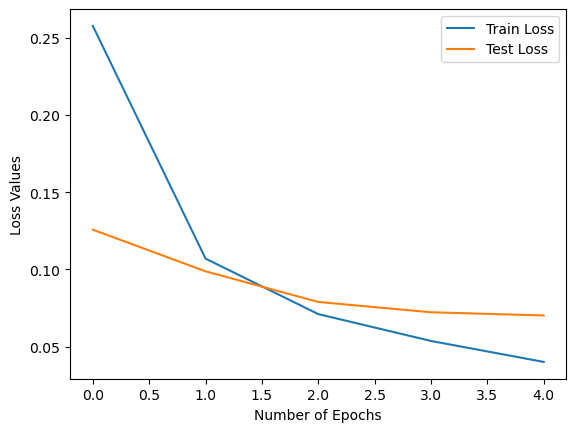

 20%|█████████                                    | 1/5 [00:10<00:40, 10.18s/it]


In Epoch: 0 | Train loss: 0.26576, Train accuracy: 92.10% | Test loss: 0.12472, Test acc: 96.23%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.02s/it]


In Epoch: 1 | Train loss: 0.10836, Train accuracy: 96.72% | Test loss: 0.09658, Test acc: 97.06%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.19s/it]


In Epoch: 2 | Train loss: 0.07348, Train accuracy: 97.76% | Test loss: 0.08475, Test acc: 97.28%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.08s/it]


In Epoch: 3 | Train loss: 0.05372, Train accuracy: 98.32% | Test loss: 0.08590, Test acc: 97.35%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.12s/it]


In Epoch: 4 | Train loss: 0.04216, Train accuracy: 98.65% | Test loss: 0.06650, Test acc: 97.91%

Train time on cpu: 50.586 seconds


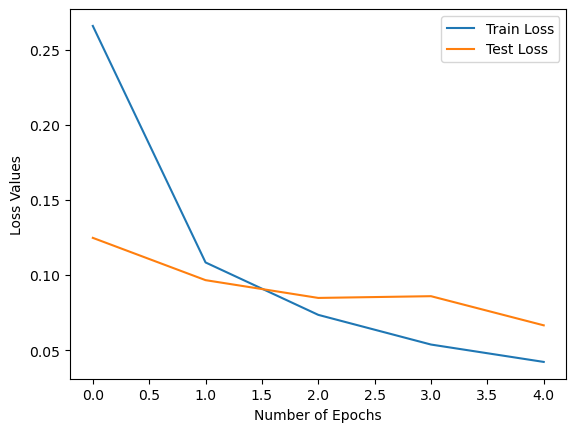

 20%|█████████                                    | 1/5 [00:10<00:41, 10.33s/it]


In Epoch: 0 | Train loss: 0.25740, Train accuracy: 92.38% | Test loss: 0.12108, Test acc: 96.14%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.07s/it]


In Epoch: 1 | Train loss: 0.10722, Train accuracy: 96.76% | Test loss: 0.08845, Test acc: 97.10%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.06s/it]


In Epoch: 2 | Train loss: 0.07152, Train accuracy: 97.83% | Test loss: 0.08084, Test acc: 97.45%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.20s/it]


In Epoch: 3 | Train loss: 0.05289, Train accuracy: 98.37% | Test loss: 0.07963, Test acc: 97.48%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.12s/it]


In Epoch: 4 | Train loss: 0.03872, Train accuracy: 98.81% | Test loss: 0.07071, Test acc: 97.67%

Train time on cpu: 50.589 seconds


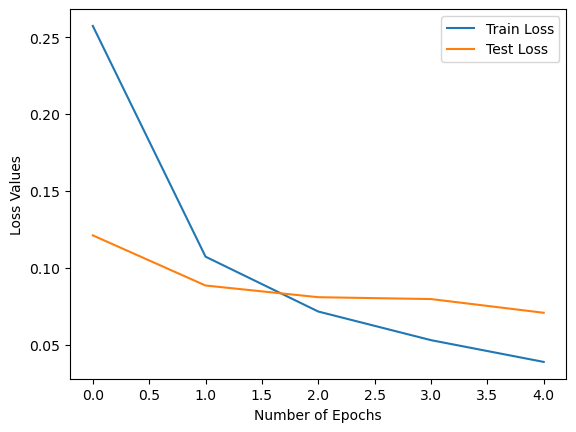

 20%|█████████                                    | 1/5 [00:10<00:40, 10.00s/it]


In Epoch: 0 | Train loss: 0.26088, Train accuracy: 92.23% | Test loss: 0.13161, Test acc: 96.11%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.15s/it]


In Epoch: 1 | Train loss: 0.10605, Train accuracy: 96.75% | Test loss: 0.09156, Test acc: 97.23%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.00s/it]


In Epoch: 2 | Train loss: 0.07178, Train accuracy: 97.82% | Test loss: 0.08307, Test acc: 97.41%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.14s/it]


In Epoch: 3 | Train loss: 0.05409, Train accuracy: 98.35% | Test loss: 0.07298, Test acc: 97.73%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.08s/it]


In Epoch: 4 | Train loss: 0.04093, Train accuracy: 98.75% | Test loss: 0.06740, Test acc: 97.83%

Train time on cpu: 50.414 seconds


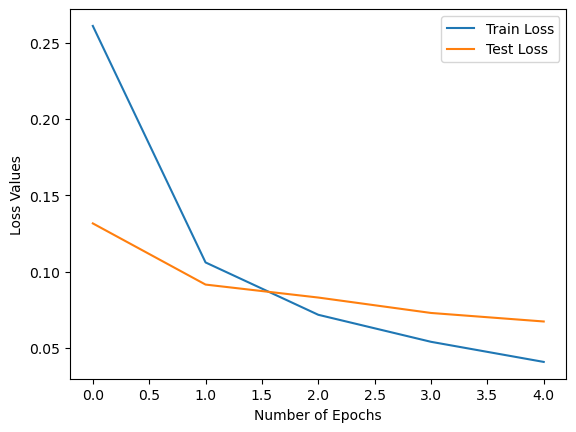

Random Seed     Loss       Accuracy   Training Time
201             0.080      97.40      50.621    
140             0.069      97.83      51.414    
193             0.070      97.88      51.158    
1003            0.063      98.09      52.344    
943             0.072      97.85      50.731    
41              0.075      97.82      50.564    
83              0.070      97.86      51.121    
580             0.067      97.91      50.586    
429             0.071      97.67      50.589    
119             0.067      97.83      50.414    


In [24]:
seeds = [201, 140, 193, 1003, 943, 41, 83, 580, 429, 119]
results2 = []
prev_seed = None

# Reset the weights only when the learning_rate has changed value
for s in seeds:
    if prev_seed is not None and lr != prev_seed:
        model_1.reset_weights()
    prev_seed = s
    learning_rate = 0.1
    num_epochs = 5
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_1.parameters(), lr = learning_rate)
    train_test_loops(s)
    plot_train_test_losses()
    # create a dictionary to store the results
    model_1_results = {} 
        #Calculate model1 results on test dataset
    model_1_results[s] = eval_model(model=model_1, data_loader=test_dataloader,
                                     loss_fn=loss_fn, seed = s, accuracy_fn=accuracy_fn)
    model_1_results[s]['Training Time'] = total_train_time_model_1

        # Store the results
    results2.append({'Random Seed': f'{s}', 'Evaluation Results': model_1_results[s]})

# Print them in a formatted way
print("{:<15} {:<10} {:<10} {:<10}".format("Random Seed", "Loss", "Accuracy", "Training Time"))
for r in results2:
    s = r['Random Seed']
    loss = r['Evaluation Results']['model_loss']
    acc = r['Evaluation Results']['model_acc']
    time = r['Evaluation Results']['Training Time']
    print("{:<15} {:<10.3f} {:<10.2f} {:<10.3f}".format(s, loss, acc, time))
# Reset weights when done, to start a new experiment
model_1.reset_weights() 

### Experiment 3
- 10 different momentums: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
- learning rate: 0.05
- seed: 39
- Loss Fucntion: CrossEntropyLoss()
- Optimizer: Stochastic Gradient Descent (SGD) 
- Epochs: 10
- Batch Size: 32


 20%|█████████                                    | 1/5 [00:10<00:42, 10.75s/it]


In Epoch: 0 | Train loss: 0.30928, Train accuracy: 91.08% | Test loss: 0.16768, Test acc: 94.98%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.72s/it]


In Epoch: 1 | Train loss: 0.13650, Train accuracy: 95.92% | Test loss: 0.12345, Test acc: 96.26%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.81s/it]


In Epoch: 2 | Train loss: 0.09429, Train accuracy: 97.17% | Test loss: 0.08786, Test acc: 97.46%



 80%|████████████████████████████████████         | 4/5 [00:42<00:10, 10.71s/it]


In Epoch: 3 | Train loss: 0.07145, Train accuracy: 97.88% | Test loss: 0.08468, Test acc: 97.32%



100%|█████████████████████████████████████████████| 5/5 [00:53<00:00, 10.79s/it]


In Epoch: 4 | Train loss: 0.05604, Train accuracy: 98.33% | Test loss: 0.07547, Test acc: 97.72%

Train time on cpu: 53.948 seconds


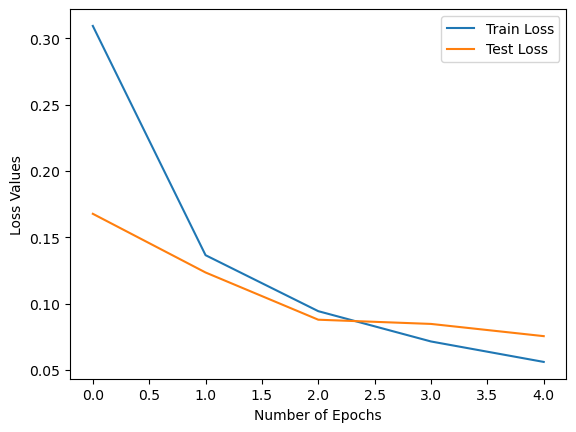

 20%|█████████                                    | 1/5 [00:10<00:43, 10.83s/it]


In Epoch: 0 | Train loss: 0.29870, Train accuracy: 91.37% | Test loss: 0.16532, Test acc: 95.04%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.71s/it]


In Epoch: 1 | Train loss: 0.13083, Train accuracy: 96.13% | Test loss: 0.11383, Test acc: 96.58%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.82s/it]


In Epoch: 2 | Train loss: 0.09033, Train accuracy: 97.28% | Test loss: 0.08225, Test acc: 97.51%



 80%|████████████████████████████████████         | 4/5 [00:42<00:10, 10.64s/it]


In Epoch: 3 | Train loss: 0.06731, Train accuracy: 98.00% | Test loss: 0.08724, Test acc: 97.26%



100%|█████████████████████████████████████████████| 5/5 [00:53<00:00, 10.75s/it]


In Epoch: 4 | Train loss: 0.05216, Train accuracy: 98.47% | Test loss: 0.07163, Test acc: 97.84%

Train time on cpu: 53.754 seconds


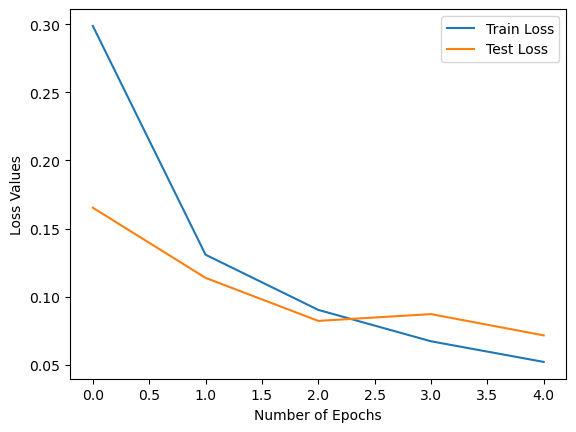

 20%|█████████                                    | 1/5 [00:10<00:41, 10.41s/it]


In Epoch: 0 | Train loss: 0.28507, Train accuracy: 91.73% | Test loss: 0.15623, Test acc: 95.20%



 40%|██████████████████                           | 2/5 [00:21<00:31, 10.60s/it]


In Epoch: 1 | Train loss: 0.12386, Train accuracy: 96.31% | Test loss: 0.11064, Test acc: 96.55%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.78s/it]


In Epoch: 2 | Train loss: 0.08457, Train accuracy: 97.42% | Test loss: 0.07727, Test acc: 97.63%



 80%|████████████████████████████████████         | 4/5 [00:42<00:10, 10.70s/it]


In Epoch: 3 | Train loss: 0.06286, Train accuracy: 98.11% | Test loss: 0.08156, Test acc: 97.38%



100%|█████████████████████████████████████████████| 5/5 [00:53<00:00, 10.72s/it]


In Epoch: 4 | Train loss: 0.04852, Train accuracy: 98.55% | Test loss: 0.07036, Test acc: 97.80%

Train time on cpu: 53.622 seconds


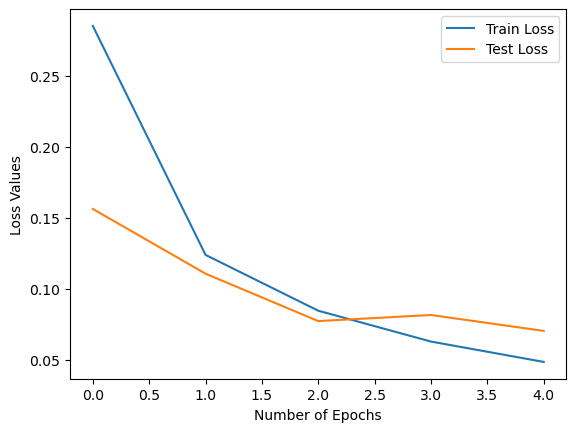

 20%|█████████                                    | 1/5 [00:10<00:42, 10.57s/it]


In Epoch: 0 | Train loss: 0.27126, Train accuracy: 92.07% | Test loss: 0.15080, Test acc: 95.30%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.84s/it]


In Epoch: 1 | Train loss: 0.11707, Train accuracy: 96.50% | Test loss: 0.10650, Test acc: 96.65%



 60%|███████████████████████████                  | 3/5 [00:32<00:21, 10.76s/it]


In Epoch: 2 | Train loss: 0.07899, Train accuracy: 97.60% | Test loss: 0.07315, Test acc: 97.80%



 80%|████████████████████████████████████         | 4/5 [00:43<00:10, 10.78s/it]


In Epoch: 3 | Train loss: 0.05838, Train accuracy: 98.22% | Test loss: 0.08283, Test acc: 97.36%



100%|█████████████████████████████████████████████| 5/5 [00:55<00:00, 11.11s/it]


In Epoch: 4 | Train loss: 0.04447, Train accuracy: 98.63% | Test loss: 0.07027, Test acc: 97.81%

Train time on cpu: 55.539 seconds


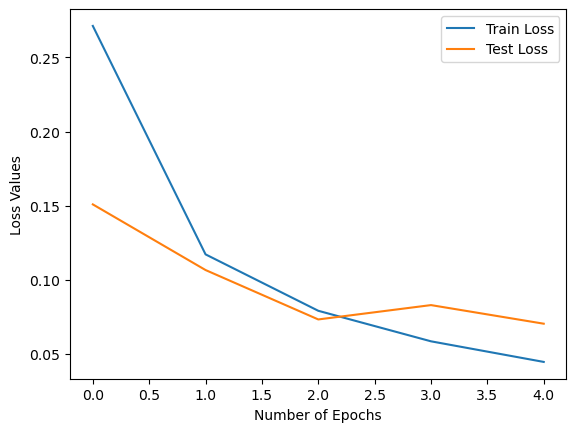

 20%|█████████                                    | 1/5 [00:14<00:59, 14.78s/it]


In Epoch: 0 | Train loss: 0.25699, Train accuracy: 92.49% | Test loss: 0.14208, Test acc: 95.63%



 40%|██████████████████                           | 2/5 [00:25<00:37, 12.51s/it]


In Epoch: 1 | Train loss: 0.10934, Train accuracy: 96.64% | Test loss: 0.10828, Test acc: 96.48%



 60%|███████████████████████████                  | 3/5 [00:36<00:23, 11.67s/it]


In Epoch: 2 | Train loss: 0.07387, Train accuracy: 97.73% | Test loss: 0.07298, Test acc: 97.69%



 80%|████████████████████████████████████         | 4/5 [00:47<00:11, 11.31s/it]


In Epoch: 3 | Train loss: 0.05426, Train accuracy: 98.34% | Test loss: 0.08206, Test acc: 97.43%



100%|█████████████████████████████████████████████| 5/5 [00:57<00:00, 11.57s/it]


In Epoch: 4 | Train loss: 0.04102, Train accuracy: 98.73% | Test loss: 0.06850, Test acc: 97.95%

Train time on cpu: 57.871 seconds


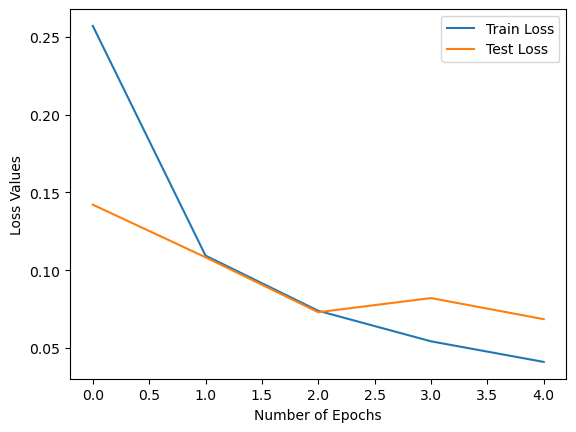

 20%|█████████                                    | 1/5 [00:11<00:44, 11.25s/it]


In Epoch: 0 | Train loss: 0.24242, Train accuracy: 92.86% | Test loss: 0.14357, Test acc: 95.62%



 40%|██████████████████                           | 2/5 [00:22<00:34, 11.33s/it]


In Epoch: 1 | Train loss: 0.10181, Train accuracy: 96.86% | Test loss: 0.10370, Test acc: 96.83%



 60%|███████████████████████████                  | 3/5 [00:34<00:22, 11.45s/it]


In Epoch: 2 | Train loss: 0.06878, Train accuracy: 97.85% | Test loss: 0.07100, Test acc: 97.69%



 80%|████████████████████████████████████         | 4/5 [00:45<00:11, 11.50s/it]


In Epoch: 3 | Train loss: 0.04942, Train accuracy: 98.48% | Test loss: 0.07953, Test acc: 97.59%



100%|█████████████████████████████████████████████| 5/5 [00:56<00:00, 11.40s/it]


In Epoch: 4 | Train loss: 0.03744, Train accuracy: 98.85% | Test loss: 0.06777, Test acc: 97.94%

Train time on cpu: 56.998 seconds


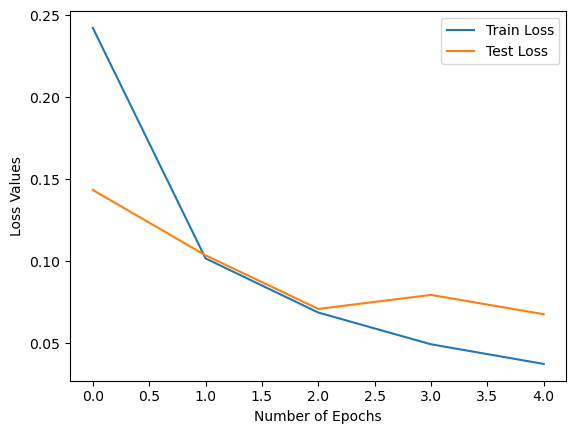

 20%|█████████                                    | 1/5 [00:11<00:45, 11.36s/it]


In Epoch: 0 | Train loss: 0.22802, Train accuracy: 93.11% | Test loss: 0.14278, Test acc: 95.57%



 40%|██████████████████                           | 2/5 [00:22<00:33, 11.24s/it]


In Epoch: 1 | Train loss: 0.09590, Train accuracy: 96.98% | Test loss: 0.10510, Test acc: 96.78%



 60%|███████████████████████████                  | 3/5 [00:33<00:22, 11.27s/it]


In Epoch: 2 | Train loss: 0.06442, Train accuracy: 97.97% | Test loss: 0.06478, Test acc: 98.01%



 80%|████████████████████████████████████         | 4/5 [00:45<00:11, 11.41s/it]


In Epoch: 3 | Train loss: 0.04495, Train accuracy: 98.63% | Test loss: 0.07604, Test acc: 97.68%



100%|█████████████████████████████████████████████| 5/5 [00:56<00:00, 11.38s/it]


In Epoch: 4 | Train loss: 0.03369, Train accuracy: 98.94% | Test loss: 0.06517, Test acc: 98.13%

Train time on cpu: 56.916 seconds


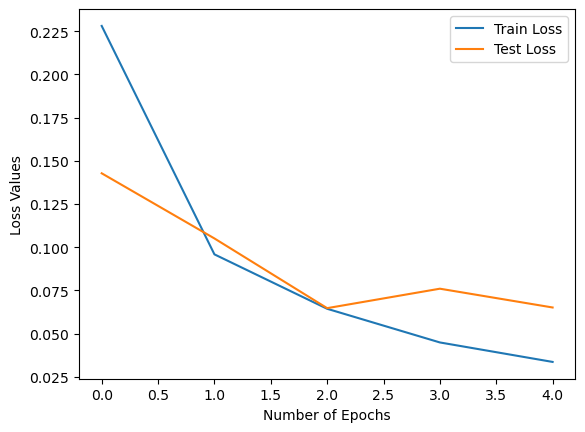

 20%|█████████                                    | 1/5 [00:11<00:44, 11.23s/it]


In Epoch: 0 | Train loss: 0.21612, Train accuracy: 93.31% | Test loss: 0.11138, Test acc: 96.42%



 40%|██████████████████                           | 2/5 [00:22<00:33, 11.05s/it]


In Epoch: 1 | Train loss: 0.09374, Train accuracy: 97.09% | Test loss: 0.09963, Test acc: 96.79%



 60%|███████████████████████████                  | 3/5 [00:33<00:22, 11.17s/it]


In Epoch: 2 | Train loss: 0.06208, Train accuracy: 98.07% | Test loss: 0.07450, Test acc: 97.87%



 80%|████████████████████████████████████         | 4/5 [00:44<00:11, 11.18s/it]


In Epoch: 3 | Train loss: 0.04489, Train accuracy: 98.56% | Test loss: 0.08001, Test acc: 97.46%



100%|█████████████████████████████████████████████| 5/5 [00:56<00:00, 11.22s/it]


In Epoch: 4 | Train loss: 0.03523, Train accuracy: 98.90% | Test loss: 0.07848, Test acc: 97.89%

Train time on cpu: 56.118 seconds


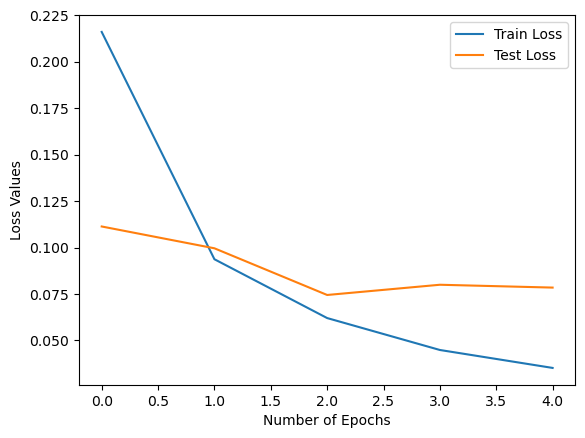

 20%|█████████                                    | 1/5 [00:10<00:42, 10.68s/it]


In Epoch: 0 | Train loss: 0.22853, Train accuracy: 92.80% | Test loss: 0.16198, Test acc: 95.28%



 40%|██████████████████                           | 2/5 [00:22<00:33, 11.11s/it]


In Epoch: 1 | Train loss: 0.10585, Train accuracy: 96.77% | Test loss: 0.11045, Test acc: 96.56%



 60%|███████████████████████████                  | 3/5 [00:33<00:22, 11.15s/it]


In Epoch: 2 | Train loss: 0.07778, Train accuracy: 97.71% | Test loss: 0.09466, Test acc: 97.17%



 80%|████████████████████████████████████         | 4/5 [00:44<00:11, 11.27s/it]


In Epoch: 3 | Train loss: 0.06115, Train accuracy: 98.04% | Test loss: 0.10234, Test acc: 97.26%



100%|█████████████████████████████████████████████| 5/5 [00:56<00:00, 11.22s/it]


In Epoch: 4 | Train loss: 0.05464, Train accuracy: 98.33% | Test loss: 0.13494, Test acc: 96.64%

Train time on cpu: 56.097 seconds


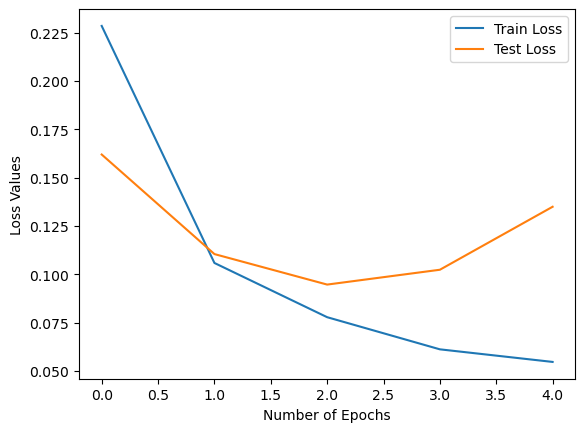

 20%|█████████                                    | 1/5 [00:10<00:40, 10.24s/it]


In Epoch: 0 | Train loss: 2.24920, Train accuracy: 16.41% | Test loss: 2.32609, Test acc: 10.10%



 40%|██████████████████                           | 2/5 [00:21<00:32, 10.73s/it]


In Epoch: 1 | Train loss: 2.33346, Train accuracy: 10.17% | Test loss: 2.39509, Test acc: 11.35%



 60%|███████████████████████████                  | 3/5 [00:31<00:20, 10.47s/it]


In Epoch: 2 | Train loss: 2.34032, Train accuracy: 9.92% | Test loss: 2.33535, Test acc: 11.35%



 80%|████████████████████████████████████         | 4/5 [00:41<00:10, 10.34s/it]


In Epoch: 3 | Train loss: 2.33493, Train accuracy: 10.40% | Test loss: 2.34605, Test acc: 11.35%



100%|█████████████████████████████████████████████| 5/5 [00:55<00:00, 11.01s/it]


In Epoch: 4 | Train loss: 2.34185, Train accuracy: 10.03% | Test loss: 2.38223, Test acc: 9.79%

Train time on cpu: 55.065 seconds


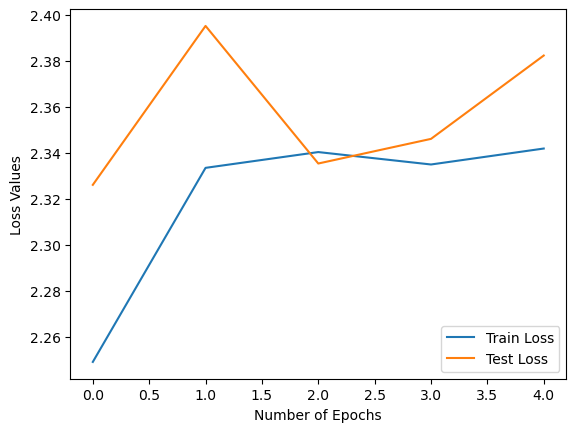

Momentum        Loss       Accuracy   Training Time
0.1             0.075      97.72      53.948    
0.2             0.072      97.84      53.754    
0.3             0.070      97.80      53.622    
0.4             0.070      97.81      55.539    
0.5             0.069      97.95      57.871    
0.6             0.068      97.94      56.998    
0.7             0.065      98.13      56.916    
0.8             0.078      97.89      56.118    
0.9             0.135      96.64      56.097    
0.99            2.382      9.79       55.065    


In [25]:
momentums = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
results3 = []
prev_m = None

# Reset the weights only when the learning_rate has changed value
for m in momentums:
    if m is not None and m != prev_m:
        model_1.reset_weights()
    prev_m = m
    learning_rate = 0.05
    seed = 39
    num_epochs = 5
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_1.parameters(), lr=learning_rate, momentum=m)
    train_test_loops(seed) # epochs
    plot_train_test_losses()
    # create a dictionary to store the results
    model_1_results = {} 
        #Calculate model1 results on test dataset
    model_1_results[m] = eval_model(model=model_1, data_loader=test_dataloader,
                                     loss_fn=loss_fn, seed = seed, accuracy_fn=accuracy_fn)
    model_1_results[m]['Training Time'] = total_train_time_model_1

    # Store the results
    results3.append({'Momentum': f'{m}', 'Evaluation Results': model_1_results[m]})

# Print them in a formatted way
print("{:<15} {:<10} {:<10} {:<10}".format("Momentum", "Loss", "Accuracy", "Training Time"))
for r in results3:
    m = r['Momentum']
    loss = r['Evaluation Results']['model_loss']
    acc = r['Evaluation Results']['model_acc']
    time = r['Evaluation Results']['Training Time']
    print("{:<15} {:<10.3f} {:<10.2f} {:<10.3f}".format(m, loss, acc, time))
# Reset weights when done, to start a new experiment
model_1.reset_weights() 

# Experiment 4 
### New Model2 without activation functions and 2 hidden layers
- 10 different hidden sizes of neurons: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
- learning rate: 0.05
- seed: 39
- epochs: 5

In [26]:
# Hyper-parameters 
input_shape = 784 # 28x28
output_shape = 10
batch_size = 32

In [27]:
from torch import nn

class Model2(nn.Module): 
    def __init__(self, input_shape: int, hidden_neurons: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            #flatten inputs into single vector
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_neurons), 
            nn.Linear(in_features=hidden_neurons, out_features=hidden_neurons),
            nn.Linear(in_features=hidden_neurons, out_features=output_shape)
         )
        
    # perform forward pass with a sequential order
    def forward(self, x):
        return self.layer_stack(x)
    
    # Reset the weights & biases
    def reset_weights(self):
        for layer in self.layer_stack:
            if isinstance (layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)

In [28]:
def train_test_loops2(seed: int):
    # Import tqdm for progress bar
    from tqdm.auto import tqdm
    
    torch.manual_seed(seed)
    train_time_start_on_cpu = timer()

    epochs = num_epochs
    global train_loss_values
    global test_loss_values
    #store the loss values
    train_loss_values = []
    test_loss_values = []

    for epoch in tqdm(range(epochs)):
        ### Training
        train_loss, train_acc = 0, 0
    # Add a loop to loop through training batches
        for batch, (X, y) in enumerate(train_dataloader):
            # Send data to cpu
            X, y = X.to(device), y.to(device)
            model_2.train() 
        # 1. Forward pass
            y_pred = model_2(X)

        # 2. Calculate loss (per batch)
            loss = loss_fn(y_pred, y)
            train_loss += loss # accumulatively add up the loss per epoch
            train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels
        # 3. Optimizer zero grad
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        train_loss /= len(train_dataloader)
    # Divide total accuracy by length of test dataloader (per batch)
        train_acc /= len(train_dataloader)
        train_loss_values.append(train_loss.detach().numpy())
        test_loss, test_acc = 0, 0 
    
        model_2.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                # Send data to cpu
                X, y = X.to(device), y.to(device)
            # 1. Forward pass
                test_pred = model_2(X)
           
            # 2. Calculate loss (accumatively)
                test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch
                test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            test_loss /= len(test_dataloader)
            
            test_loss_values.append(test_loss.detach().numpy())
            test_acc /= len(test_dataloader)
       

    ## Print out what's happening
        print(f"\nIn Epoch: {epoch} | Train loss: {train_loss:.5f}, Train accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
        
# Calculate training time      
    train_time_end_on_cpu = timer()
    global total_train_time_model_2
    total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_2.parameters()).device))

 20%|█████████                                    | 1/5 [00:08<00:32,  8.15s/it]


In Epoch: 0 | Train loss: 0.51640, Train accuracy: 84.94% | Test loss: 0.34918, Test acc: 90.25%



 40%|██████████████████                           | 2/5 [00:16<00:25,  8.39s/it]


In Epoch: 1 | Train loss: 0.33925, Train accuracy: 90.41% | Test loss: 0.31975, Test acc: 91.17%



 60%|███████████████████████████                  | 3/5 [00:25<00:16,  8.36s/it]


In Epoch: 2 | Train loss: 0.31718, Train accuracy: 91.05% | Test loss: 0.31218, Test acc: 91.12%



 80%|████████████████████████████████████         | 4/5 [00:33<00:08,  8.28s/it]


In Epoch: 3 | Train loss: 0.30396, Train accuracy: 91.36% | Test loss: 0.30098, Test acc: 91.12%



100%|█████████████████████████████████████████████| 5/5 [00:41<00:00,  8.33s/it]


In Epoch: 4 | Train loss: 0.29456, Train accuracy: 91.71% | Test loss: 0.29167, Test acc: 91.83%

Train time on cpu: 41.654 seconds


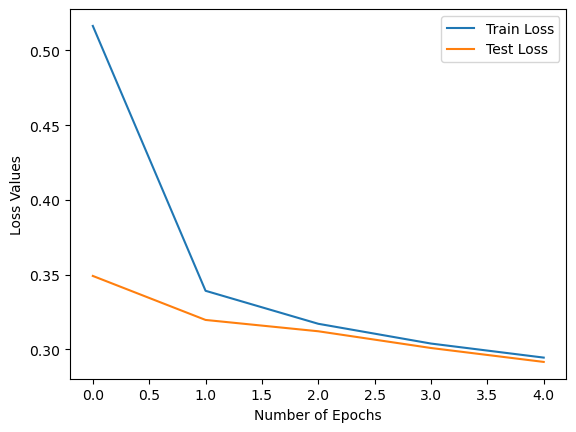

 20%|█████████                                    | 1/5 [00:08<00:33,  8.43s/it]


In Epoch: 0 | Train loss: 0.40036, Train accuracy: 88.50% | Test loss: 0.32890, Test acc: 90.98%



 40%|██████████████████                           | 2/5 [00:16<00:25,  8.49s/it]


In Epoch: 1 | Train loss: 0.31263, Train accuracy: 91.22% | Test loss: 0.30318, Test acc: 91.45%



 60%|███████████████████████████                  | 3/5 [00:25<00:16,  8.39s/it]


In Epoch: 2 | Train loss: 0.29904, Train accuracy: 91.55% | Test loss: 0.29705, Test acc: 91.71%



 80%|████████████████████████████████████         | 4/5 [00:34<00:08,  8.57s/it]


In Epoch: 3 | Train loss: 0.29191, Train accuracy: 91.78% | Test loss: 0.29493, Test acc: 91.31%



100%|█████████████████████████████████████████████| 5/5 [00:42<00:00,  8.51s/it]


In Epoch: 4 | Train loss: 0.28656, Train accuracy: 91.97% | Test loss: 0.28738, Test acc: 91.86%

Train time on cpu: 42.567 seconds


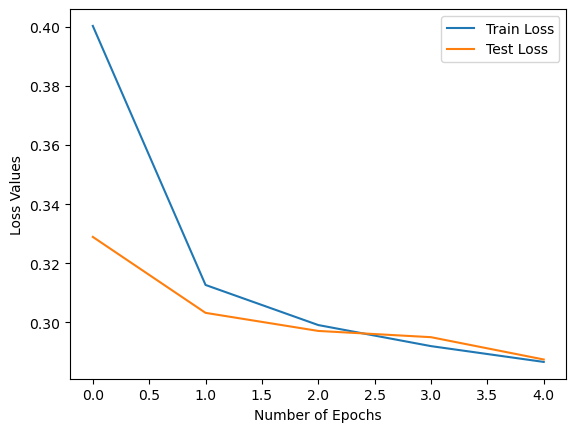

 20%|█████████                                    | 1/5 [00:08<00:34,  8.57s/it]


In Epoch: 0 | Train loss: 0.39642, Train accuracy: 88.63% | Test loss: 0.32070, Test acc: 90.93%



 40%|██████████████████                           | 2/5 [00:16<00:25,  8.43s/it]


In Epoch: 1 | Train loss: 0.31246, Train accuracy: 91.15% | Test loss: 0.30660, Test acc: 91.28%



 60%|███████████████████████████                  | 3/5 [00:27<00:18,  9.47s/it]


In Epoch: 2 | Train loss: 0.29906, Train accuracy: 91.53% | Test loss: 0.29720, Test acc: 91.62%



 80%|████████████████████████████████████         | 4/5 [00:38<00:09,  9.89s/it]


In Epoch: 3 | Train loss: 0.29186, Train accuracy: 91.80% | Test loss: 0.29445, Test acc: 91.32%



100%|█████████████████████████████████████████████| 5/5 [00:46<00:00,  9.39s/it]


In Epoch: 4 | Train loss: 0.28660, Train accuracy: 92.01% | Test loss: 0.28844, Test acc: 91.96%

Train time on cpu: 46.960 seconds


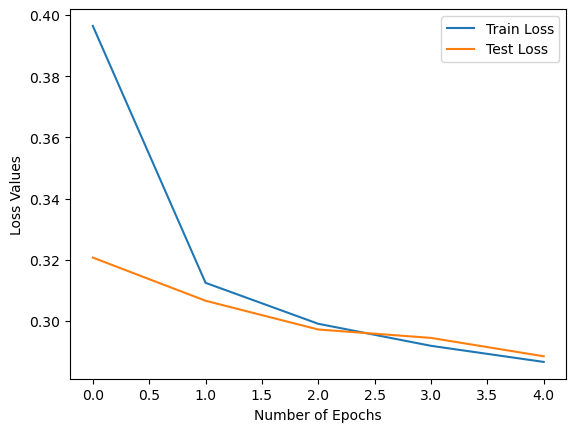

 20%|█████████                                    | 1/5 [00:08<00:35,  8.84s/it]


In Epoch: 0 | Train loss: 0.38940, Train accuracy: 88.75% | Test loss: 0.32543, Test acc: 90.95%



 40%|██████████████████                           | 2/5 [00:17<00:25,  8.56s/it]


In Epoch: 1 | Train loss: 0.31272, Train accuracy: 91.11% | Test loss: 0.30363, Test acc: 91.28%



 60%|███████████████████████████                  | 3/5 [00:25<00:17,  8.55s/it]


In Epoch: 2 | Train loss: 0.29905, Train accuracy: 91.55% | Test loss: 0.29740, Test acc: 91.48%



 80%|████████████████████████████████████         | 4/5 [00:34<00:08,  8.60s/it]


In Epoch: 3 | Train loss: 0.29190, Train accuracy: 91.76% | Test loss: 0.29491, Test acc: 91.25%



100%|█████████████████████████████████████████████| 5/5 [00:42<00:00,  8.54s/it]


In Epoch: 4 | Train loss: 0.28655, Train accuracy: 91.97% | Test loss: 0.28776, Test acc: 91.85%

Train time on cpu: 42.704 seconds


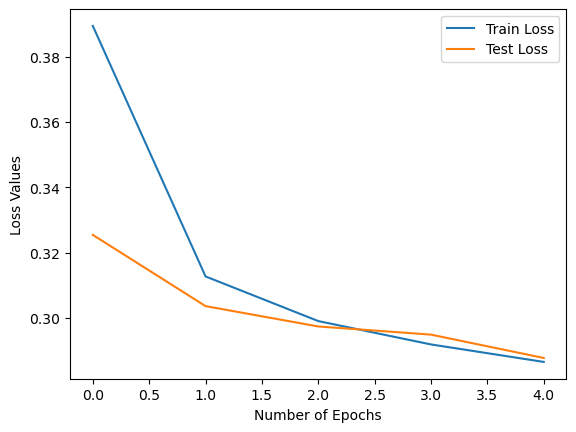

 20%|█████████                                    | 1/5 [00:08<00:34,  8.72s/it]


In Epoch: 0 | Train loss: 0.38600, Train accuracy: 88.91% | Test loss: 0.32320, Test acc: 90.88%



 40%|██████████████████                           | 2/5 [00:17<00:26,  8.77s/it]


In Epoch: 1 | Train loss: 0.31203, Train accuracy: 91.17% | Test loss: 0.30893, Test acc: 91.17%



 60%|███████████████████████████                  | 3/5 [00:26<00:17,  8.84s/it]


In Epoch: 2 | Train loss: 0.29869, Train accuracy: 91.61% | Test loss: 0.29740, Test acc: 91.63%



 80%|████████████████████████████████████         | 4/5 [00:34<00:08,  8.67s/it]


In Epoch: 3 | Train loss: 0.29166, Train accuracy: 91.78% | Test loss: 0.29550, Test acc: 91.42%



100%|█████████████████████████████████████████████| 5/5 [00:43<00:00,  8.66s/it]


In Epoch: 4 | Train loss: 0.28627, Train accuracy: 91.97% | Test loss: 0.28784, Test acc: 91.97%

Train time on cpu: 43.297 seconds


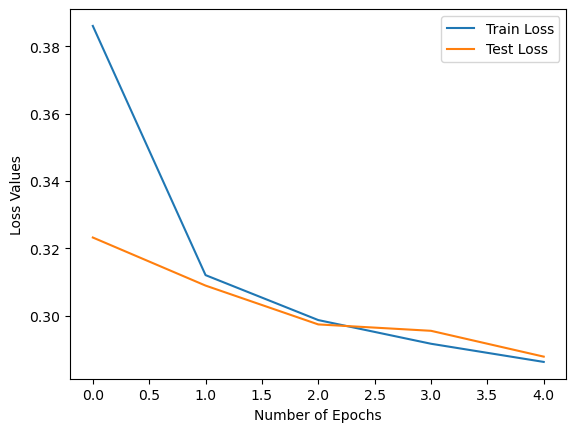

 20%|█████████                                    | 1/5 [00:08<00:35,  8.90s/it]


In Epoch: 0 | Train loss: 0.38478, Train accuracy: 88.89% | Test loss: 0.32126, Test acc: 90.97%



 40%|██████████████████                           | 2/5 [00:17<00:26,  8.70s/it]


In Epoch: 1 | Train loss: 0.31180, Train accuracy: 91.22% | Test loss: 0.30082, Test acc: 91.45%



 60%|███████████████████████████                  | 3/5 [00:26<00:17,  8.73s/it]


In Epoch: 2 | Train loss: 0.29877, Train accuracy: 91.59% | Test loss: 0.29941, Test acc: 91.55%



 80%|████████████████████████████████████         | 4/5 [00:35<00:08,  8.82s/it]


In Epoch: 3 | Train loss: 0.29187, Train accuracy: 91.76% | Test loss: 0.29469, Test acc: 91.35%



100%|█████████████████████████████████████████████| 5/5 [00:43<00:00,  8.74s/it]


In Epoch: 4 | Train loss: 0.28670, Train accuracy: 91.99% | Test loss: 0.28860, Test acc: 91.80%

Train time on cpu: 43.684 seconds


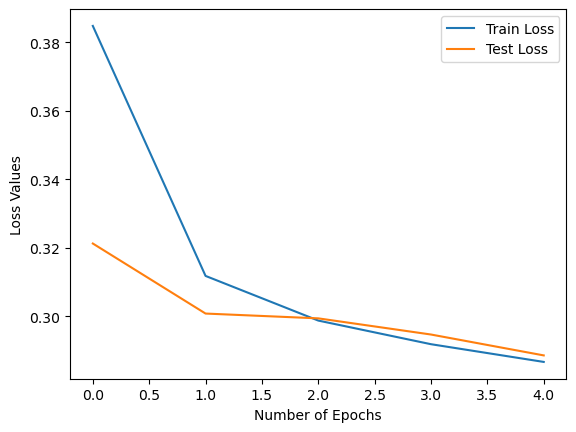

 20%|█████████                                    | 1/5 [00:08<00:34,  8.70s/it]


In Epoch: 0 | Train loss: 0.38591, Train accuracy: 88.89% | Test loss: 0.32501, Test acc: 90.92%



 40%|██████████████████                           | 2/5 [00:17<00:25,  8.64s/it]


In Epoch: 1 | Train loss: 0.31221, Train accuracy: 91.15% | Test loss: 0.30412, Test acc: 91.39%



 60%|███████████████████████████                  | 3/5 [00:26<00:17,  8.79s/it]


In Epoch: 2 | Train loss: 0.29906, Train accuracy: 91.61% | Test loss: 0.29815, Test acc: 91.51%



 80%|████████████████████████████████████         | 4/5 [00:34<00:08,  8.65s/it]


In Epoch: 3 | Train loss: 0.29198, Train accuracy: 91.72% | Test loss: 0.29765, Test acc: 91.27%



100%|█████████████████████████████████████████████| 5/5 [00:43<00:00,  8.71s/it]


In Epoch: 4 | Train loss: 0.28669, Train accuracy: 91.97% | Test loss: 0.28901, Test acc: 91.86%

Train time on cpu: 43.566 seconds


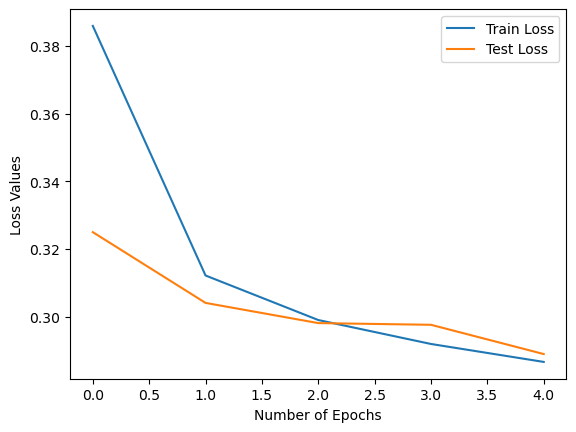

 20%|█████████                                    | 1/5 [00:09<00:37,  9.29s/it]


In Epoch: 0 | Train loss: 0.38351, Train accuracy: 89.01% | Test loss: 0.31947, Test acc: 91.19%



 40%|██████████████████                           | 2/5 [00:17<00:26,  8.83s/it]


In Epoch: 1 | Train loss: 0.31148, Train accuracy: 91.18% | Test loss: 0.30371, Test acc: 91.32%



 60%|███████████████████████████                  | 3/5 [00:26<00:17,  8.94s/it]


In Epoch: 2 | Train loss: 0.29847, Train accuracy: 91.53% | Test loss: 0.29710, Test acc: 91.62%



 80%|████████████████████████████████████         | 4/5 [00:35<00:08,  8.87s/it]


In Epoch: 3 | Train loss: 0.29160, Train accuracy: 91.77% | Test loss: 0.29618, Test acc: 91.35%



100%|█████████████████████████████████████████████| 5/5 [00:44<00:00,  8.92s/it]


In Epoch: 4 | Train loss: 0.28628, Train accuracy: 92.04% | Test loss: 0.28796, Test acc: 91.99%

Train time on cpu: 44.604 seconds


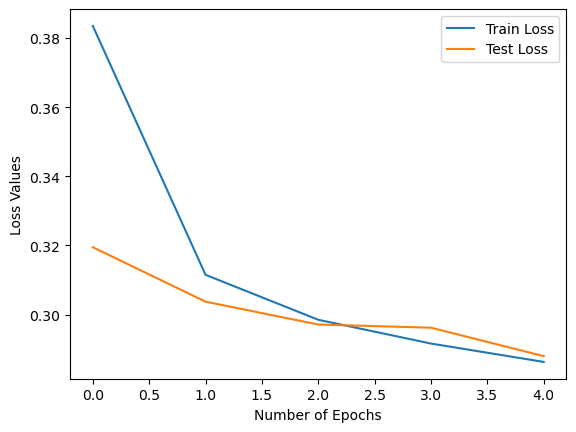

 20%|█████████                                    | 1/5 [00:08<00:35,  8.81s/it]


In Epoch: 0 | Train loss: 0.38275, Train accuracy: 88.92% | Test loss: 0.32379, Test acc: 91.04%



 40%|██████████████████                           | 2/5 [00:17<00:26,  8.72s/it]


In Epoch: 1 | Train loss: 0.31281, Train accuracy: 91.16% | Test loss: 0.30414, Test acc: 91.27%



 60%|███████████████████████████                  | 3/5 [00:26<00:17,  8.83s/it]


In Epoch: 2 | Train loss: 0.29943, Train accuracy: 91.53% | Test loss: 0.29886, Test acc: 91.51%



 80%|████████████████████████████████████         | 4/5 [00:35<00:08,  8.79s/it]


In Epoch: 3 | Train loss: 0.29224, Train accuracy: 91.74% | Test loss: 0.29541, Test acc: 91.40%



100%|█████████████████████████████████████████████| 5/5 [00:44<00:00,  8.81s/it]


In Epoch: 4 | Train loss: 0.28706, Train accuracy: 91.99% | Test loss: 0.28812, Test acc: 91.97%

Train time on cpu: 44.048 seconds


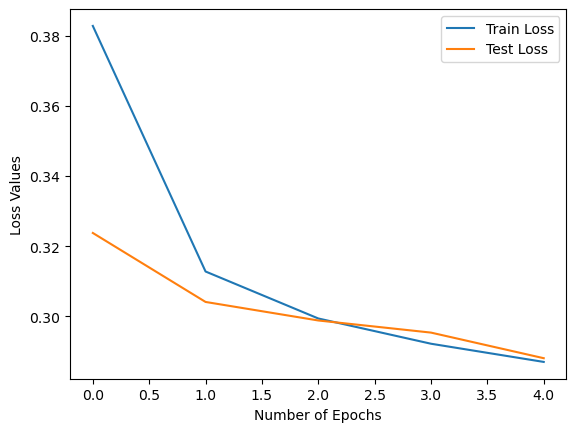

 20%|█████████                                    | 1/5 [00:08<00:35,  9.00s/it]


In Epoch: 0 | Train loss: 0.38191, Train accuracy: 89.05% | Test loss: 0.31966, Test acc: 91.12%



 40%|██████████████████                           | 2/5 [00:18<00:27,  9.07s/it]


In Epoch: 1 | Train loss: 0.31167, Train accuracy: 91.19% | Test loss: 0.30451, Test acc: 91.27%



 60%|███████████████████████████                  | 3/5 [00:26<00:17,  8.87s/it]


In Epoch: 2 | Train loss: 0.29853, Train accuracy: 91.55% | Test loss: 0.29932, Test acc: 91.48%



 80%|████████████████████████████████████         | 4/5 [00:35<00:08,  8.97s/it]


In Epoch: 3 | Train loss: 0.29165, Train accuracy: 91.74% | Test loss: 0.29671, Test acc: 91.21%



100%|█████████████████████████████████████████████| 5/5 [00:44<00:00,  8.98s/it]


In Epoch: 4 | Train loss: 0.28636, Train accuracy: 92.04% | Test loss: 0.28842, Test acc: 91.95%

Train time on cpu: 44.887 seconds


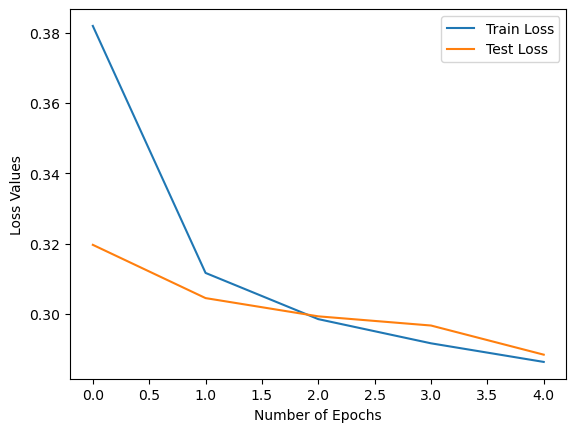

Hidden Neurons  Loss       Accuracy   Training Time
10              0.292      91.83      41.654    
20              0.287      91.86      42.567    
30              0.288      91.96      46.960    
40              0.288      91.85      42.704    
50              0.288      91.97      43.297    
60              0.289      91.80      43.684    
70              0.289      91.86      43.566    
80              0.288      91.99      44.604    
90              0.288      91.97      44.048    
100             0.288      91.95      44.887    


In [29]:
hiddenn_neurons = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
results4 = []
prev_hn = None
for hn in hiddenn_neurons:
    if prev_hn is not None and hn != prev_hn:
        model_2 = Model2(input_shape, hn, output_shape).to(device)
        model_2.reset_weights()
    else: 
         model_2 = Model2(input_shape, hn, output_shape).to(device)
    prev_hn = hn
    seed = 39
    learning_rate = 0.05
    num_epochs = 5
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)
    train_test_loops2(seed)
    plot_train_test_losses()
    model_2_results = {}
    model_2_results[hn] = eval_model(model=model_2, data_loader=test_dataloader,
                               loss_fn=loss_fn, seed=seed, accuracy_fn=accuracy_fn)
    model_2_results[hn]['Training Time'] = total_train_time_model_2

    results4.append({'Hidden Neurons': f'{hn}', 'Evaluation Results': model_2_results[hn]})

# Print the results in a formatted way
print("{:<15} {:<10} {:<10} {:<10}".format("Hidden Neurons", "Loss", "Accuracy", "Training Time"))
for r in results4:
    hn = r['Hidden Neurons']
    loss = r['Evaluation Results']['model_loss']
    acc = r['Evaluation Results']['model_acc']
    time = r['Evaluation Results']['Training Time']
    print("{:<15} {:<10.3f} {:<10.2f} {:<10.3f}".format(hn, loss, acc, time))

# Reset weights when done, to start a new experiment
model_2.reset_weights()


# Experiment 5
## Applying 8 different training algorithms ( optimizers)
- SGD
- Adam
- Adagrad
- RMSprop
- ADAdelta
- ASGD
- Rprop
- AdamW

 20%|█████████                                    | 1/5 [00:08<00:35,  8.82s/it]


In Epoch: 0 | Train loss: 0.37941, Train accuracy: 89.11% | Test loss: 0.31904, Test acc: 91.07%



 40%|██████████████████                           | 2/5 [00:17<00:26,  8.89s/it]


In Epoch: 1 | Train loss: 0.31194, Train accuracy: 91.21% | Test loss: 0.30159, Test acc: 91.34%



 60%|███████████████████████████                  | 3/5 [00:26<00:18,  9.00s/it]


In Epoch: 2 | Train loss: 0.29887, Train accuracy: 91.57% | Test loss: 0.29801, Test acc: 91.61%



 80%|████████████████████████████████████         | 4/5 [00:35<00:08,  8.85s/it]


In Epoch: 3 | Train loss: 0.29183, Train accuracy: 91.77% | Test loss: 0.29709, Test acc: 91.35%



100%|█████████████████████████████████████████████| 5/5 [00:44<00:00,  8.86s/it]


In Epoch: 4 | Train loss: 0.28682, Train accuracy: 91.97% | Test loss: 0.28744, Test acc: 92.03%

Train time on cpu: 44.295 seconds


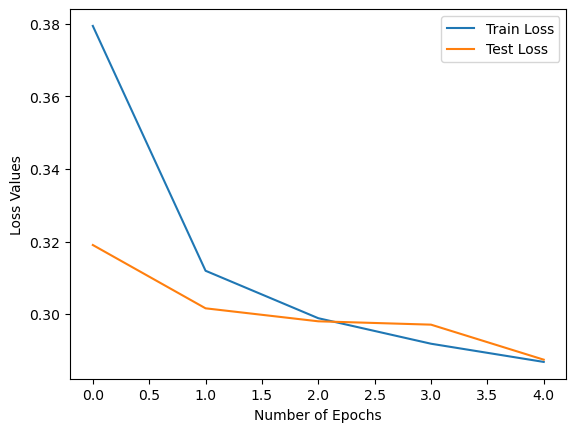

 20%|█████████                                    | 1/5 [00:10<00:41, 10.33s/it]


In Epoch: 0 | Train loss: 54.04063, Train accuracy: 79.54% | Test loss: 3.80892, Test acc: 84.52%



 40%|██████████████████                           | 2/5 [00:21<00:33, 11.00s/it]


In Epoch: 1 | Train loss: 8.03531, Train accuracy: 82.43% | Test loss: 19.29023, Test acc: 81.03%



 60%|███████████████████████████                  | 3/5 [00:37<00:26, 13.37s/it]


In Epoch: 2 | Train loss: 89.84476, Train accuracy: 83.78% | Test loss: 6.82061, Test acc: 87.10%



 80%|████████████████████████████████████         | 4/5 [00:56<00:15, 15.22s/it]


In Epoch: 3 | Train loss: 65.94282, Train accuracy: 82.91% | Test loss: 46.93096, Test acc: 89.01%



100%|█████████████████████████████████████████████| 5/5 [01:07<00:00, 13.45s/it]


In Epoch: 4 | Train loss: 18.56940, Train accuracy: 85.61% | Test loss: 22.39088, Test acc: 85.06%

Train time on cpu: 67.266 seconds


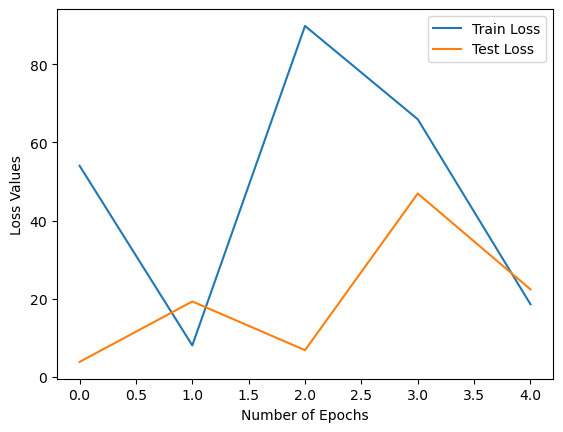

 20%|█████████                                    | 1/5 [00:09<00:37,  9.36s/it]


In Epoch: 0 | Train loss: 0.57379, Train accuracy: 89.28% | Test loss: 0.31524, Test acc: 91.32%



 40%|██████████████████                           | 2/5 [00:18<00:27,  9.31s/it]


In Epoch: 1 | Train loss: 0.29317, Train accuracy: 91.80% | Test loss: 0.28764, Test acc: 91.85%



 60%|███████████████████████████                  | 3/5 [00:28<00:19,  9.53s/it]


In Epoch: 2 | Train loss: 0.27812, Train accuracy: 92.22% | Test loss: 0.28455, Test acc: 92.15%



 80%|████████████████████████████████████         | 4/5 [00:37<00:09,  9.50s/it]


In Epoch: 3 | Train loss: 0.27005, Train accuracy: 92.52% | Test loss: 0.28047, Test acc: 92.09%



100%|█████████████████████████████████████████████| 5/5 [00:47<00:00,  9.41s/it]


In Epoch: 4 | Train loss: 0.26507, Train accuracy: 92.64% | Test loss: 0.27947, Test acc: 92.32%

Train time on cpu: 47.037 seconds


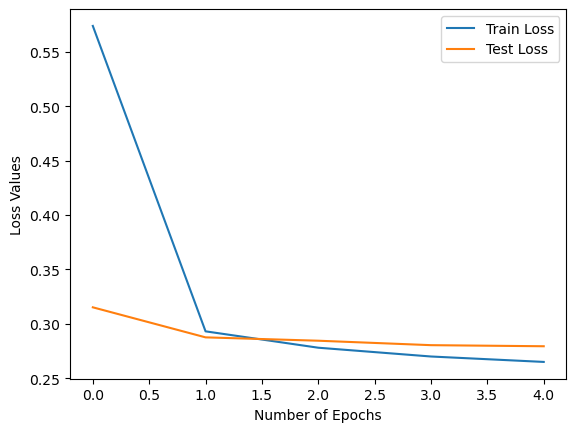

 20%|█████████                                    | 1/5 [00:09<00:39,  9.77s/it]


In Epoch: 0 | Train loss: 329.51450, Train accuracy: 79.53% | Test loss: 35.38646, Test acc: 80.03%



 40%|██████████████████                           | 2/5 [00:19<00:28,  9.67s/it]


In Epoch: 1 | Train loss: 246.98759, Train accuracy: 81.11% | Test loss: 46.85844, Test acc: 74.00%



 60%|███████████████████████████                  | 3/5 [00:28<00:19,  9.52s/it]


In Epoch: 2 | Train loss: 236.85962, Train accuracy: 82.18% | Test loss: 83.59202, Test acc: 72.78%



 80%|████████████████████████████████████         | 4/5 [00:38<00:09,  9.64s/it]


In Epoch: 3 | Train loss: 301.50433, Train accuracy: 82.34% | Test loss: 165.37704, Test acc: 86.17%



100%|█████████████████████████████████████████████| 5/5 [00:48<00:00,  9.62s/it]


In Epoch: 4 | Train loss: 212.86838, Train accuracy: 84.12% | Test loss: 59.35029, Test acc: 89.37%

Train time on cpu: 48.111 seconds


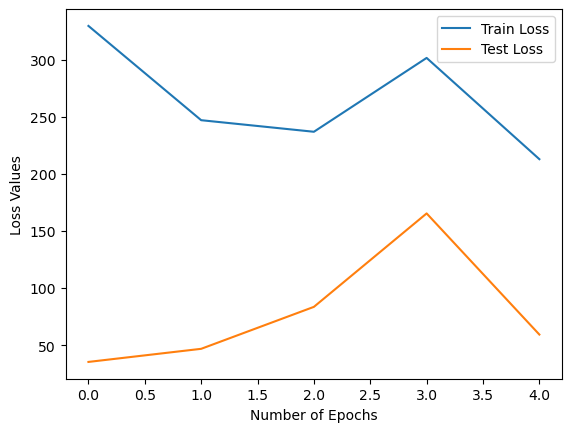

 20%|█████████                                    | 1/5 [00:09<00:39,  9.77s/it]


In Epoch: 0 | Train loss: 0.48870, Train accuracy: 86.74% | Test loss: 0.31398, Test acc: 91.26%



 40%|██████████████████                           | 2/5 [00:20<00:30, 10.26s/it]


In Epoch: 1 | Train loss: 0.31404, Train accuracy: 91.14% | Test loss: 0.28962, Test acc: 91.85%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.09s/it]


In Epoch: 2 | Train loss: 0.29540, Train accuracy: 91.69% | Test loss: 0.28429, Test acc: 92.00%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.12s/it]


In Epoch: 3 | Train loss: 0.28603, Train accuracy: 92.03% | Test loss: 0.27797, Test acc: 92.06%



100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.19s/it]


In Epoch: 4 | Train loss: 0.27965, Train accuracy: 92.19% | Test loss: 0.27474, Test acc: 92.33%

Train time on cpu: 50.966 seconds


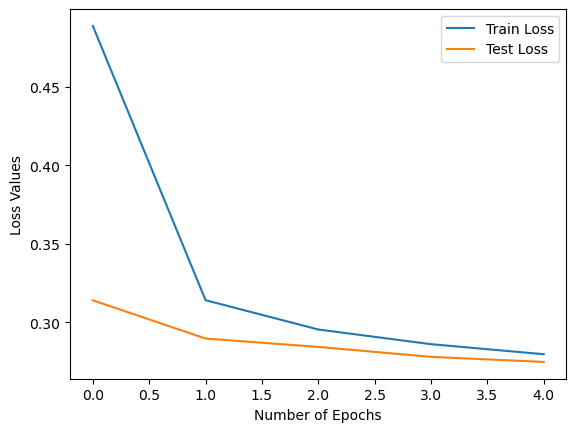

 20%|█████████                                    | 1/5 [00:09<00:36,  9.16s/it]


In Epoch: 0 | Train loss: 0.37930, Train accuracy: 89.11% | Test loss: 0.31851, Test acc: 91.07%



 40%|██████████████████                           | 2/5 [00:18<00:27,  9.30s/it]


In Epoch: 1 | Train loss: 0.31154, Train accuracy: 91.19% | Test loss: 0.30096, Test acc: 91.34%



 60%|███████████████████████████                  | 3/5 [00:28<00:18,  9.45s/it]


In Epoch: 2 | Train loss: 0.29834, Train accuracy: 91.57% | Test loss: 0.29736, Test acc: 91.61%



 80%|████████████████████████████████████         | 4/5 [00:37<00:09,  9.36s/it]


In Epoch: 3 | Train loss: 0.29126, Train accuracy: 91.78% | Test loss: 0.29572, Test acc: 91.34%



100%|█████████████████████████████████████████████| 5/5 [00:46<00:00,  9.37s/it]


In Epoch: 4 | Train loss: 0.28618, Train accuracy: 91.98% | Test loss: 0.28669, Test acc: 92.05%

Train time on cpu: 46.840 seconds


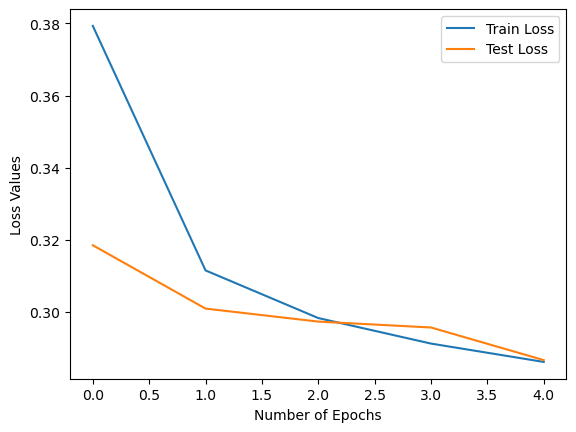

 20%|█████████                                    | 1/5 [00:13<00:52, 13.10s/it]


In Epoch: 0 | Train loss: 3.95046, Train accuracy: 81.28% | Test loss: 3.42388, Test acc: 82.80%



 40%|██████████████████                           | 2/5 [00:26<00:39, 13.32s/it]


In Epoch: 1 | Train loss: 3.48720, Train accuracy: 82.25% | Test loss: 3.33444, Test acc: 83.21%



 60%|███████████████████████████                  | 3/5 [00:39<00:26, 13.36s/it]


In Epoch: 2 | Train loss: 3.36594, Train accuracy: 82.52% | Test loss: 3.23483, Test acc: 83.52%



 80%|████████████████████████████████████         | 4/5 [00:53<00:13, 13.31s/it]


In Epoch: 3 | Train loss: 3.25936, Train accuracy: 82.80% | Test loss: 3.14796, Test acc: 83.74%



100%|█████████████████████████████████████████████| 5/5 [01:06<00:00, 13.32s/it]


In Epoch: 4 | Train loss: 3.16907, Train accuracy: 83.04% | Test loss: 3.06757, Test acc: 83.90%

Train time on cpu: 66.607 seconds


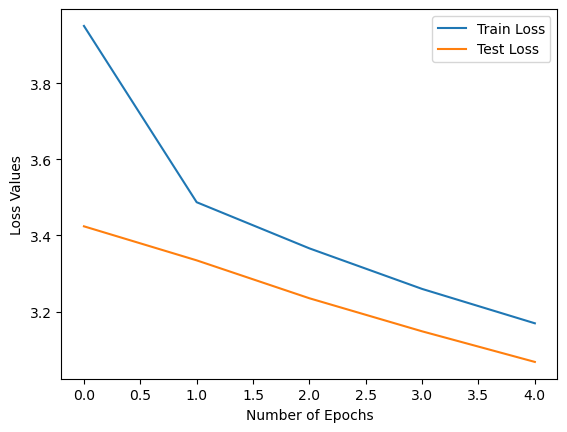

 20%|█████████                                    | 1/5 [00:10<00:41, 10.34s/it]


In Epoch: 0 | Train loss: 53.35245, Train accuracy: 79.44% | Test loss: 1.41259, Test acc: 85.28%



 40%|██████████████████                           | 2/5 [00:20<00:31, 10.35s/it]


In Epoch: 1 | Train loss: 0.43706, Train accuracy: 89.20% | Test loss: 0.33539, Test acc: 90.55%



 60%|███████████████████████████                  | 3/5 [00:30<00:20, 10.28s/it]


In Epoch: 2 | Train loss: 0.37132, Train accuracy: 89.27% | Test loss: 0.44254, Test acc: 87.45%



 80%|████████████████████████████████████         | 4/5 [00:40<00:10, 10.20s/it]


In Epoch: 3 | Train loss: 128.79413, Train accuracy: 83.31% | Test loss: 4.39515, Test acc: 87.71%



100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.25s/it]


In Epoch: 4 | Train loss: 0.91678, Train accuracy: 89.02% | Test loss: 0.31207, Test acc: 91.27%

Train time on cpu: 51.238 seconds


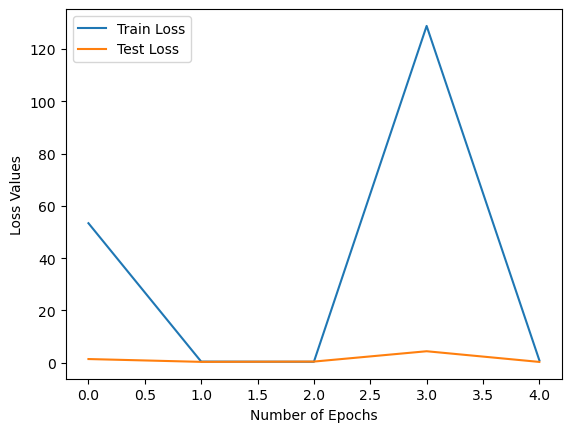

Optimizers      Loss       Accuracy   Training Time
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
) 0.287      92.03      44.295    
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.05
    maximize: False
    weight_decay: 0
) 22.391     85.06      67.266    
Adagrad (
Parameter Group 0
    eps: 1e-10
    foreach: None
    initial_accumulator_value: 0
    lr: 0.05
    lr_decay: 0
    maximize: False
    weight_decay: 0
) 0.279      92.32      47.037    
RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    weight_decay: 0
) 59.350     89.37      48.111    
Adadelta (
Parameter Group 0
    eps: 1e-06
    foreach: Non

In [30]:
optimizers = [    
              torch.optim.SGD(model_2.parameters(), lr=learning_rate),
              torch.optim.Adam(model_2.parameters(), lr=learning_rate),
              torch.optim.Adagrad(model_2.parameters(), lr=learning_rate),
              torch.optim.RMSprop(model_2.parameters(), lr=learning_rate),
              torch.optim.Adadelta(model_2.parameters(), lr=learning_rate),
              torch.optim.ASGD(model_2.parameters(), lr=learning_rate),
              torch.optim.Rprop(model_2.parameters(), lr=learning_rate),
              torch.optim.AdamW(model_2.parameters(), lr=learning_rate)
]
results5 = []
prev_opt = None
for opt in optimizers:
    if prev_opt is not None and opt != prev_opt:
        model_2.reset_weights()
    prev_opt = opt
    seed = 39
    learning_rate = 0.05
    num_epochs = 5
    loss_fn = nn.CrossEntropyLoss()
    optimizer = opt
    train_test_loops2(seed)
    plot_train_test_losses()
    model_2_results = {}
    model_2_results[opt] = eval_model(model=model_2, data_loader=test_dataloader,
                                   loss_fn=loss_fn, seed=seed, accuracy_fn=accuracy_fn)
    model_2_results[opt]['Training Time'] = total_train_time_model_2

#     results4.append({'Optimizers': f'{hn}, 'Optimizer': type(optimizer).__name__, 'Evaluation Results': model_2_results[hn]})
    results5.append({'Optimizers': f'{opt}', 'Evaluation Results': model_2_results[opt]})

# Print the results in a formatted way
print("{:<15} {:<10} {:<10} {:<10}".format("Optimizers", "Loss", "Accuracy", "Training Time"))
for r in results5:
    opt = r['Optimizers']
    loss = r['Evaluation Results']['model_loss']
    acc = r['Evaluation Results']['model_acc']
    time = r['Evaluation Results']['Training Time']
    print("{:<15} {:<10.3f} {:<10.2f} {:<10.3f}".format(opt, loss, acc, time))

# Reset weights when done, to start a new experiment
model_2.reset_weights()